In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
pd.set_option('max_columns', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

Dataset has 1000 rows and 40 columns

In [5]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

There are two identifier columns and policy number and incident location while there is one column _c39 which 0 unique values. All these columns need to be dropped.

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no null values except for _c39 column which has all the values as null value therefore it needs to be dropped.

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are 21 object type columns including the label column rest are all of numerical types.

In [8]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Dataset is highly imbalanced.

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Count of each column is 1000 except for _c39 that is no nan values in other columns, mean and median do no coincide in many columns which indicate skewness in dataset. There is high variance except for age, number_of_vehicles_involved and bodily_injuries column. Difference between interquartile ranges, minimum and maximum is not equal which indicates presence of outliers.

### Univariate Analysis

In [10]:
#Separating categoriacal and continuous features
cat=[i for i in df.columns if df[i].nunique()<25]
cont=[i for i in df.columns if df[i].nunique()>25]

N    753
Y    247
Name: fraud_reported, dtype: int64

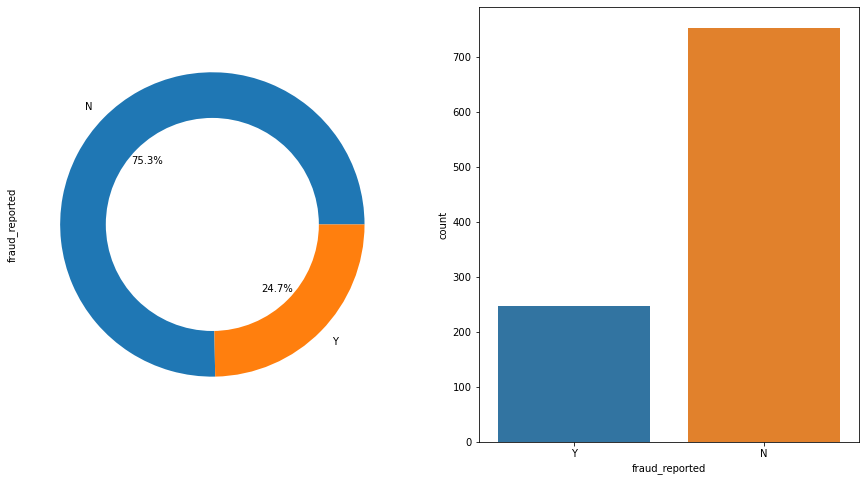

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['fraud_reported'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='fraud_reported',data=df)
df['fraud_reported'].value_counts()

Dataset is highly imbalanced as there are only 24.7% no's and rest our yes.

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

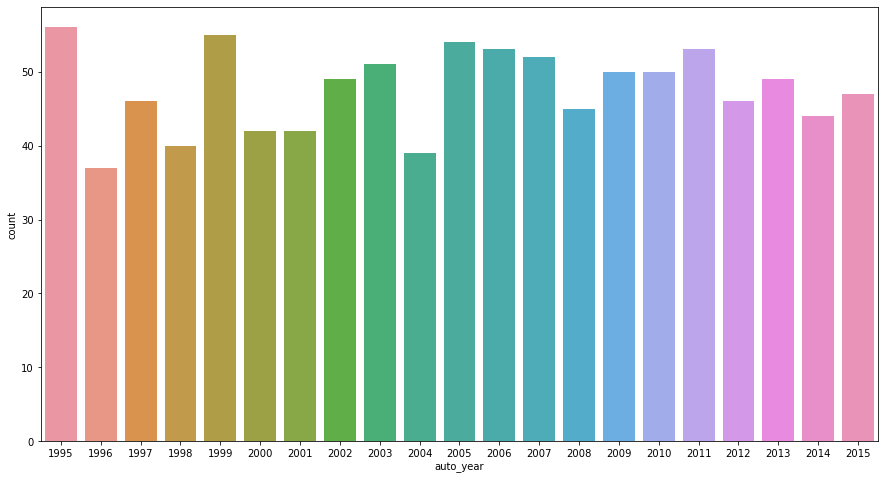

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='auto_year',data=df)
df['auto_year'].value_counts()

Most of the cars who had accidents were made in the year 1995 followed by 1999 but there is no trend that old cars are the ones who go through most accidents as there are a high no. of accidents of car made in the later years.

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

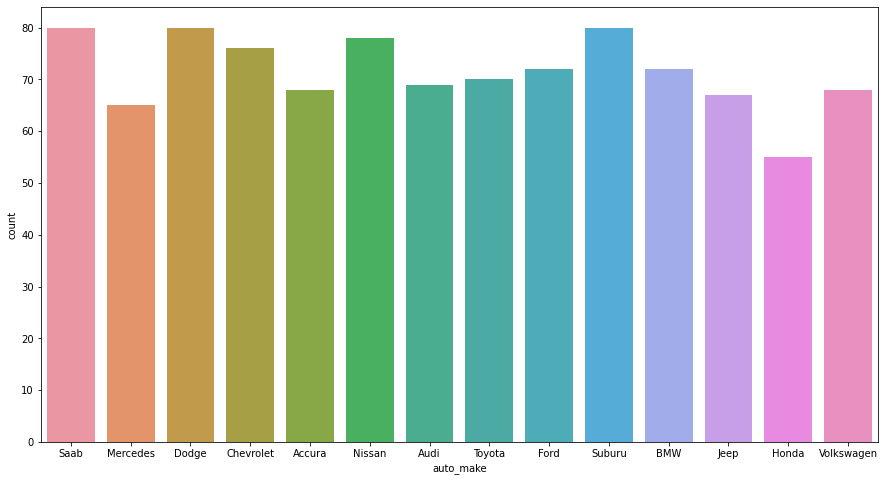

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='auto_make',data=df)
df['auto_make'].value_counts()

Honda mercedes and jeep cars have had the least accidents but the number is not way less as compared to other auto makes.

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

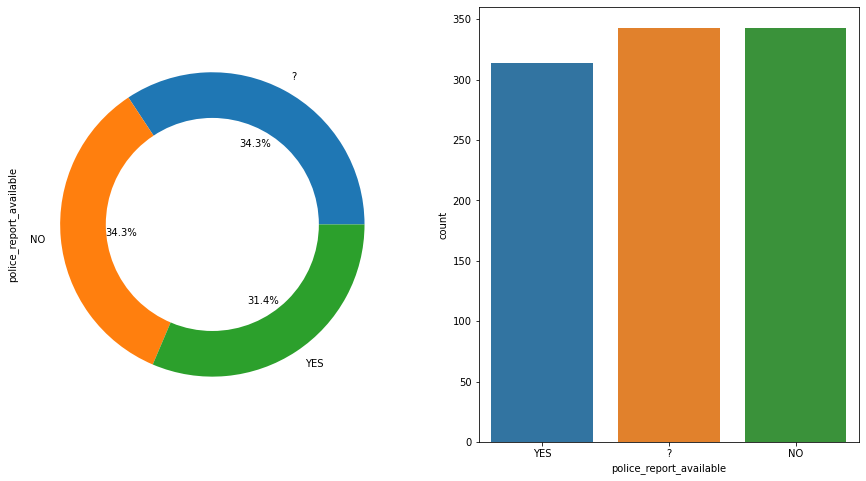

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['police_report_available'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='police_report_available',data=df)
df['police_report_available'].value_counts()

In most of the cases either police report is not filed or the data is missing.

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

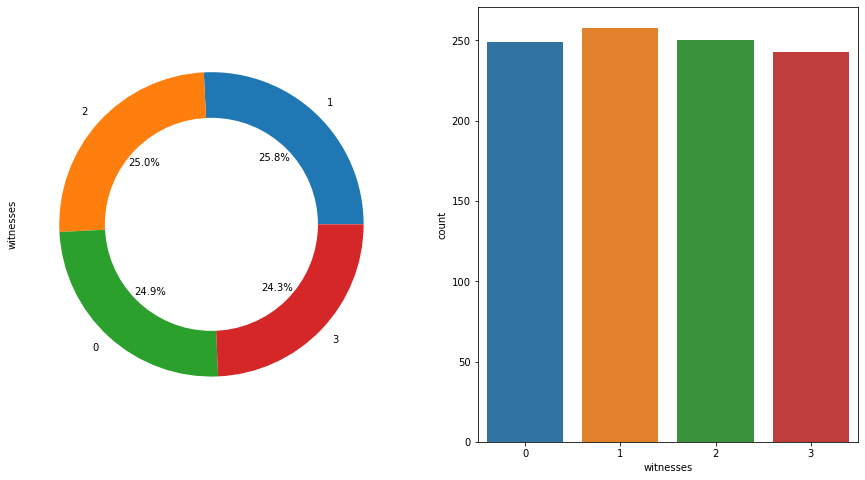

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['witnesses'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='witnesses',data=df)
df['witnesses'].value_counts()

Number of witnesses do not vary much in accidents, while the most no. of witnesses are 1 and least are 3

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

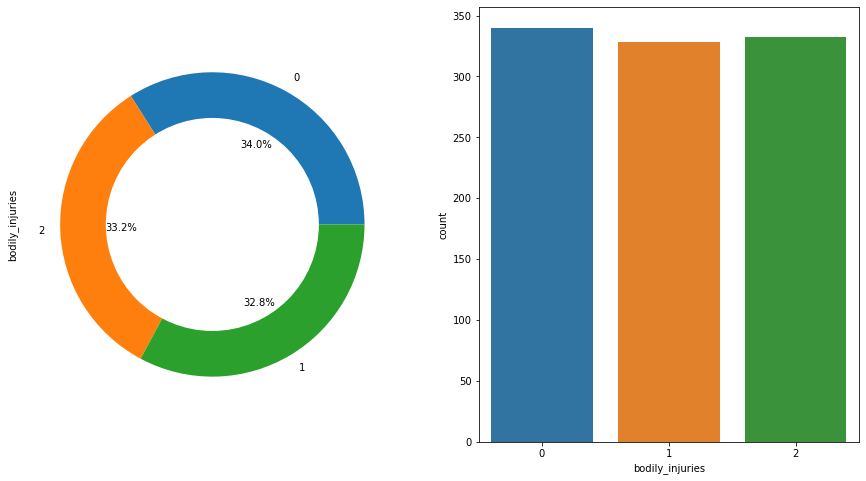

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['bodily_injuries'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='bodily_injuries',data=df)
df['bodily_injuries'].value_counts()

In majority of the cases bodily injuries are 0 while the number is not way high as this category seems to be almost balanced between category 0,1 and 2.

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

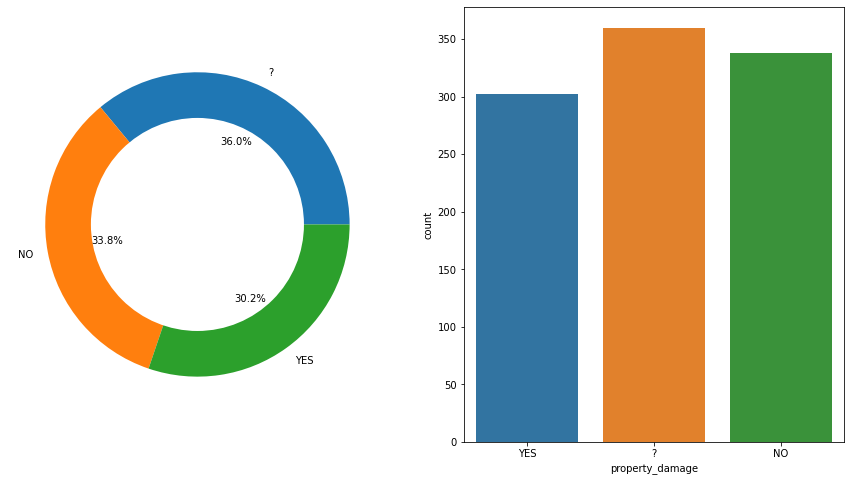

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['property_damage'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='property_damage',data=df)
df['property_damage'].value_counts()

In most of the case data is missing or is nnot provided while there is almost balancing in case of property damage or not.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

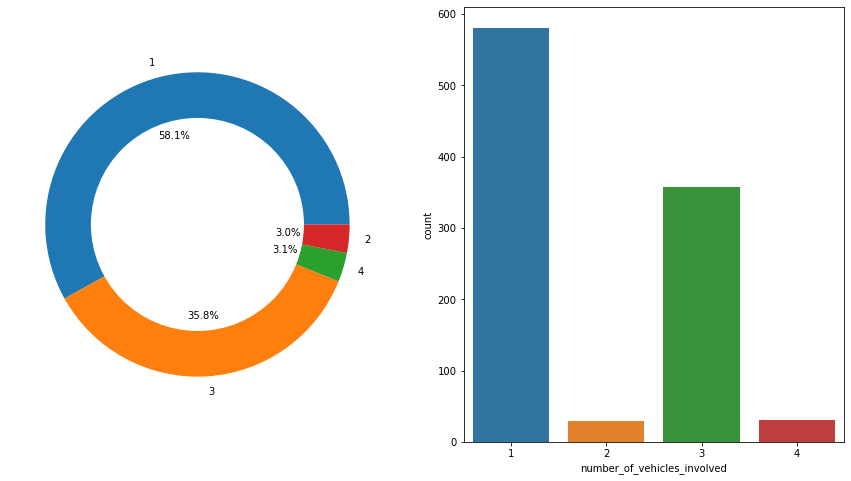

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['number_of_vehicles_involved'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='number_of_vehicles_involved',data=df)
df['number_of_vehicles_involved'].value_counts()

In around 58.1% of times no. of vehicles involved is just one followed by no. 3. Accidents involving 2 or 4 vehicles is way less.

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

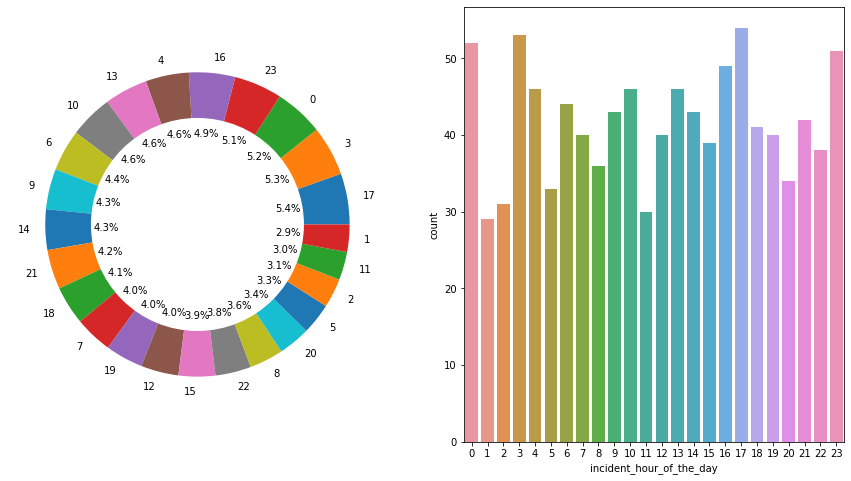

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['incident_hour_of_the_day'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='incident_hour_of_the_day',data=df)
df['incident_hour_of_the_day'].value_counts()

Most accidents happen at 6 pm or 3 am or 12 am, while the no. of accidents at different hours of the daay do not vary much.

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

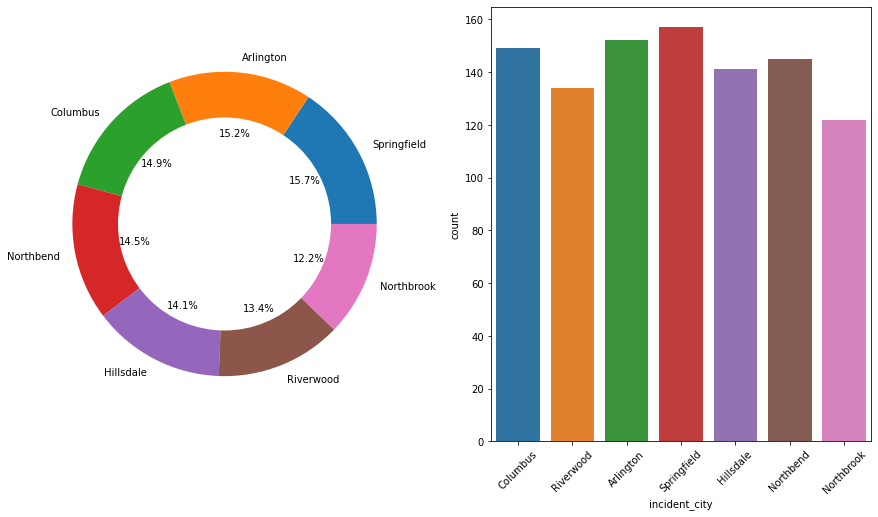

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['incident_city'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='incident_city',data=df)
plt.xticks(rotation=45)
df['incident_city'].value_counts()

Most accidents occur in Springfield city followed by Arlington but the no. do not vary much, highest percentages of accidents are 15.7% while least is 12.2%.

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

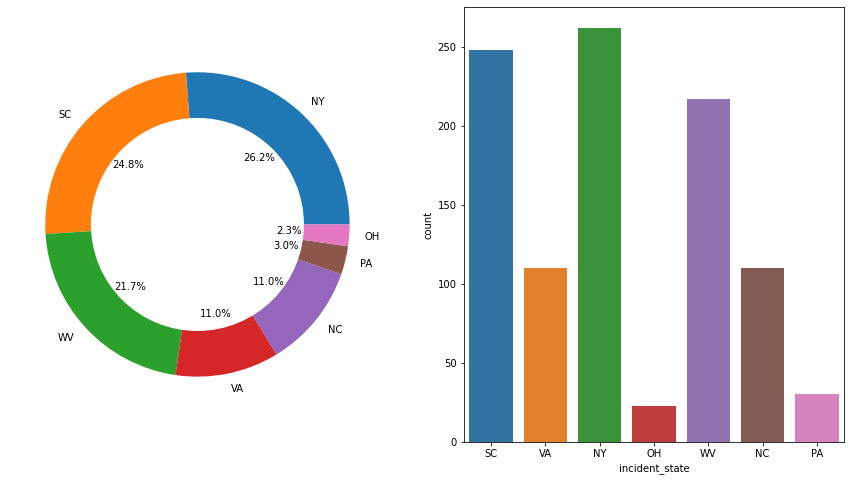

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['incident_state'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='incident_state',data=df)
df['incident_state'].value_counts()

Maximum incidents occur in New york state while least in Ohio.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

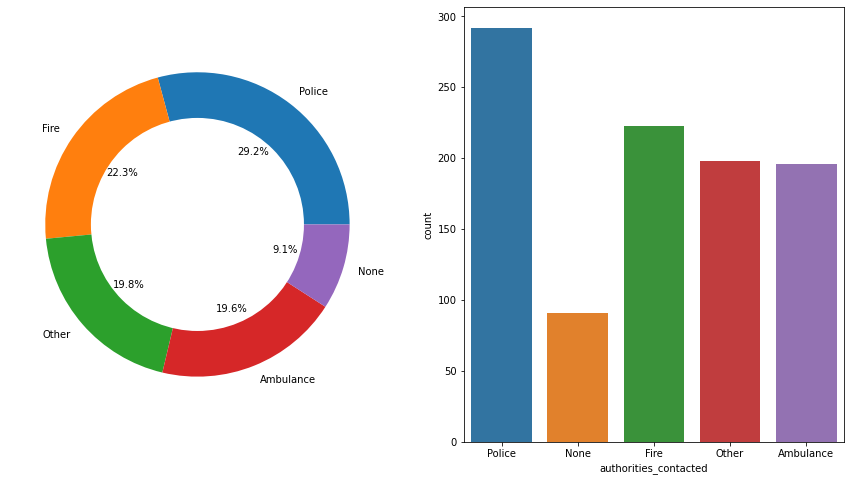

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['authorities_contacted'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='authorities_contacted',data=df)
df['authorities_contacted'].value_counts()

Im most of the incidents Police is contacted followed by fire. There are very few cases when none of the authorities are contacted.

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

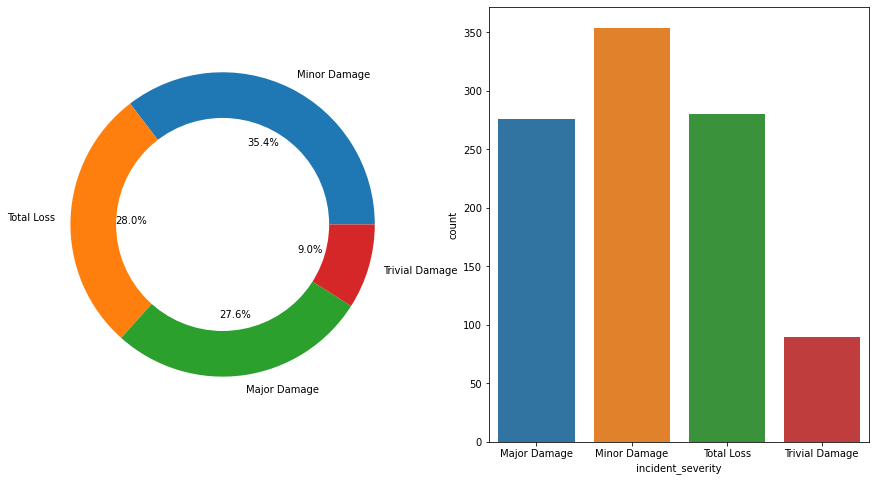

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['incident_severity'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='incident_severity',data=df)
df['incident_severity'].value_counts()

In most of the incidents, there is minor damage, while trivial damage happens in rare case almost 9%.

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

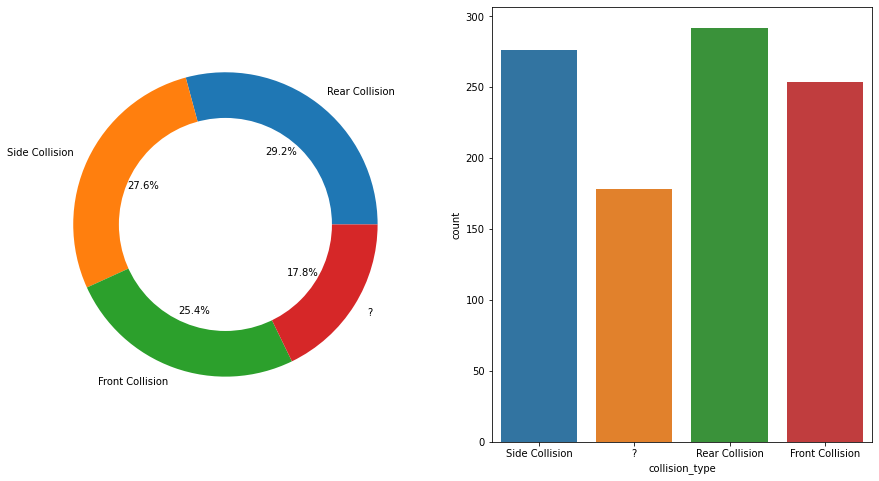

In [24]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['collision_type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='collision_type',data=df)
df['collision_type'].value_counts()

In most of the acccidents there is rear collision while 17.8% of the times data is missing or maybe there is a chance that it is a theft.

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

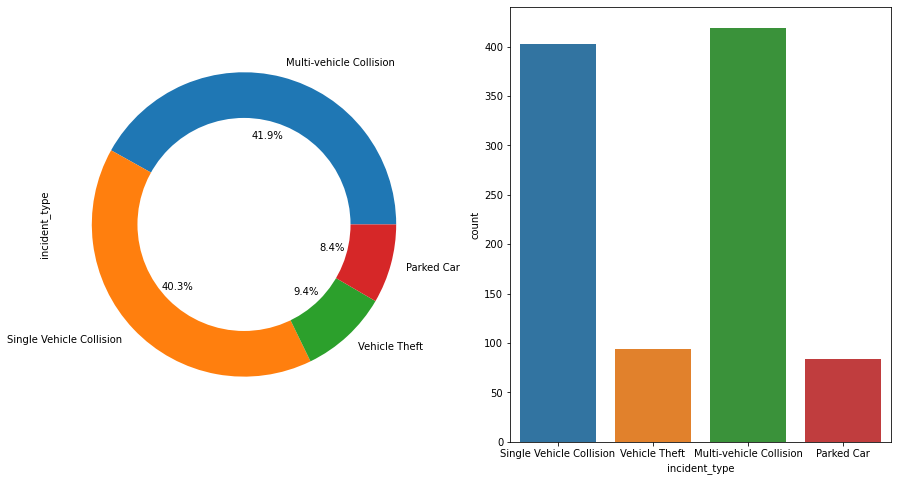

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['incident_type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='incident_type',data=df)
df['incident_type'].value_counts()

Highests incidents are reported of multi vehicle collision, Vehicle theft is quite low amd parked car incidents are least.

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

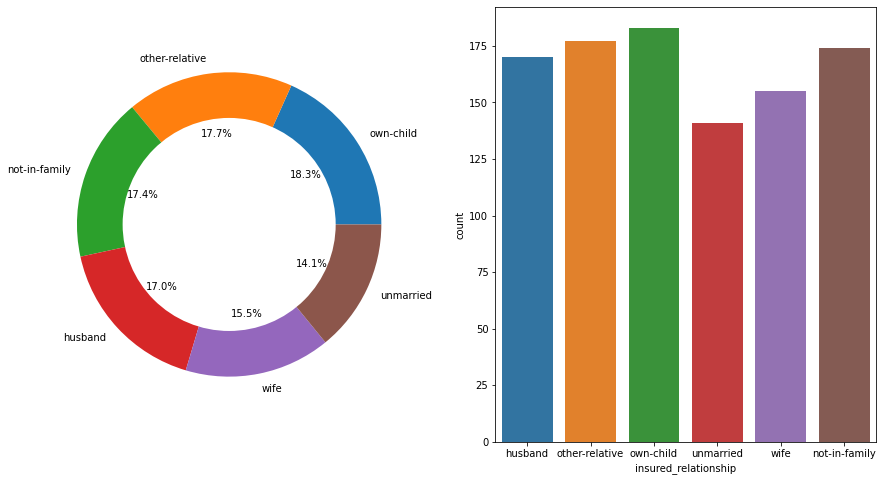

In [26]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['insured_relationship'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='insured_relationship',data=df)
df['insured_relationship'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

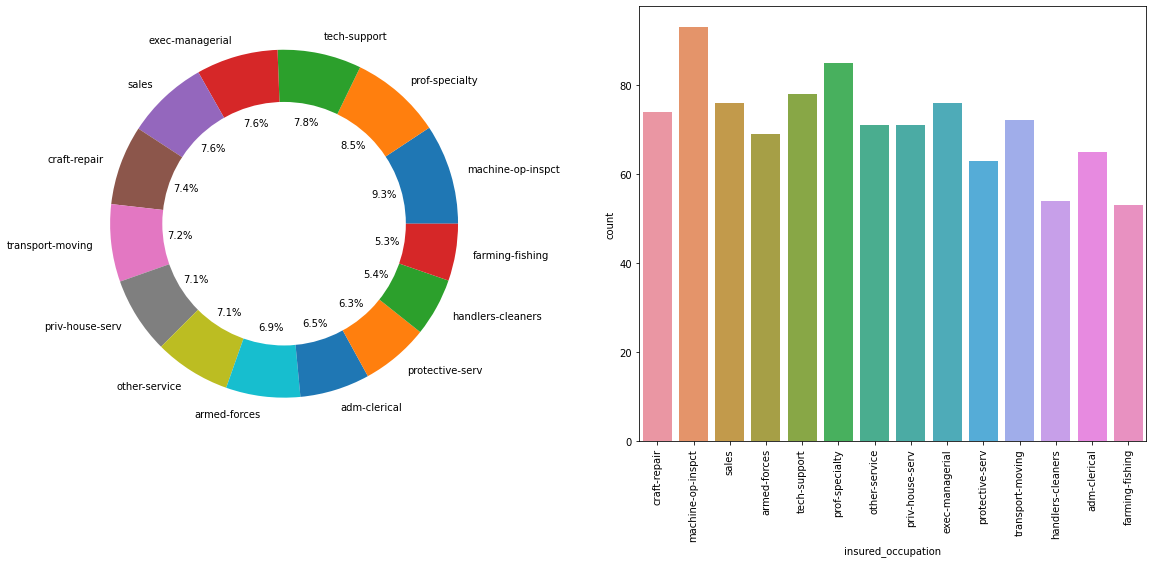

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['insured_occupation'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='insured_occupation',data=df)
plt.xticks(rotation=90)
df['insured_occupation'].value_counts()

Highest incidents are reported by machine-op-inspct  followed by prof-speciality, farming fishing people are the ones involved in least accidents.

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

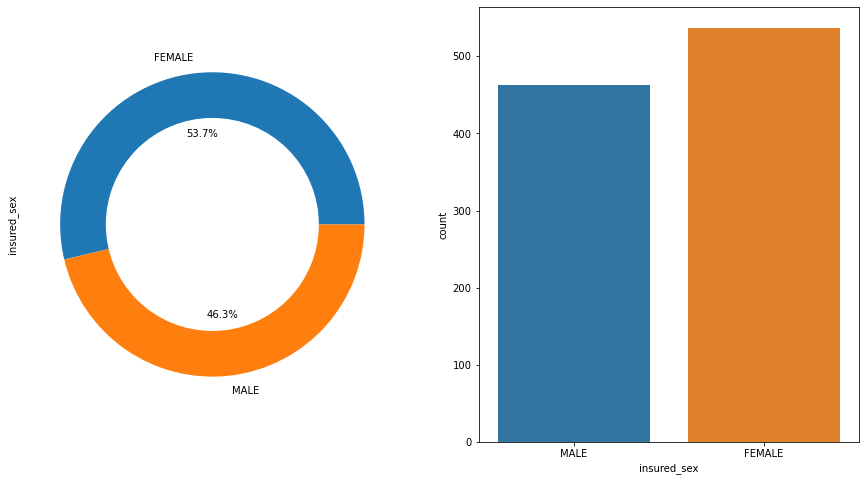

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['insured_sex'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='insured_sex',data=df)
df['insured_sex'].value_counts()

No. of females and males are almost equal, while there is slight higher number in no. of females involved in incidents.

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

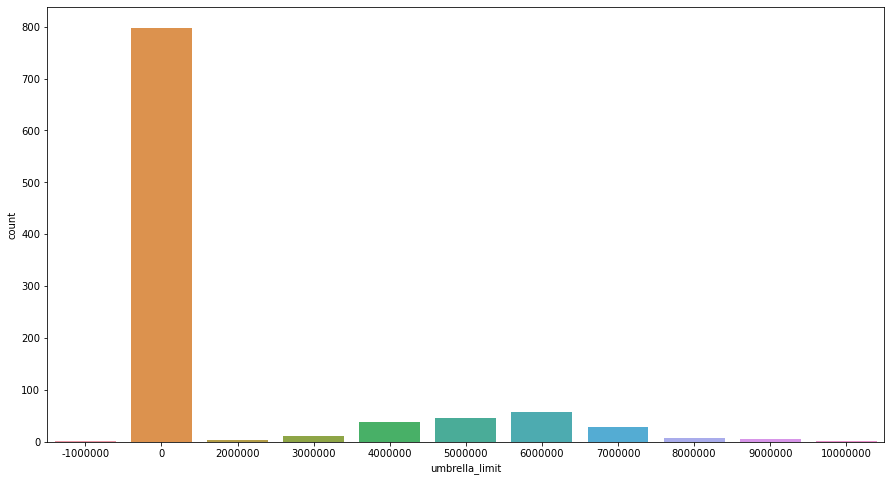

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x='umbrella_limit',data=df)
df['umbrella_limit'].value_counts()

Most of the insurance's umbrella limit is zero, there are very few people who subscribe for umbrella limit.

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

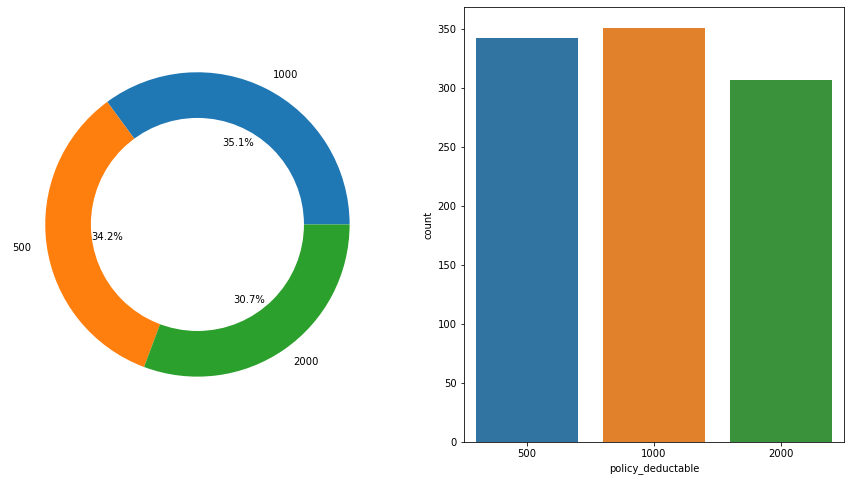

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['policy_deductable'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='policy_deductable',data=df)
df['policy_deductable'].value_counts()

In most of the cases 1000 is deductable while 2000 is deductable in very rare cases.

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

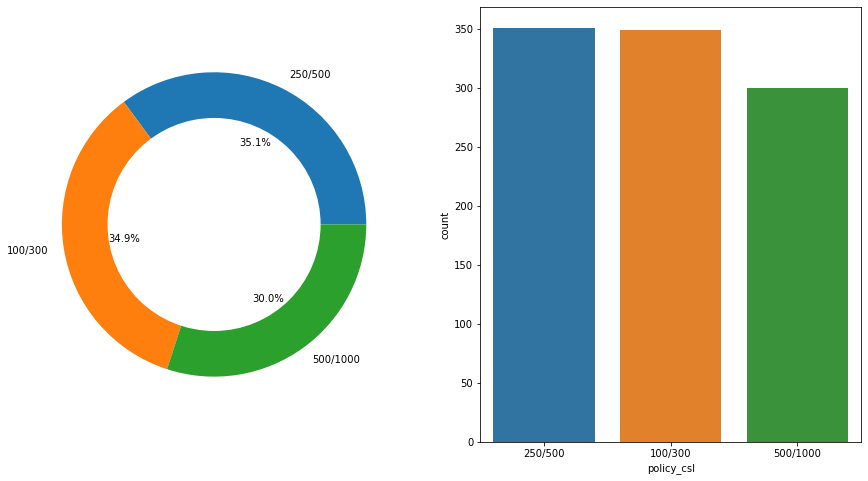

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['policy_csl'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='policy_csl',data=df)
df['policy_csl'].value_counts()

Most of the people subscribe for 250/500 policy csl while least subscribe for 500/1000 policy csl.

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

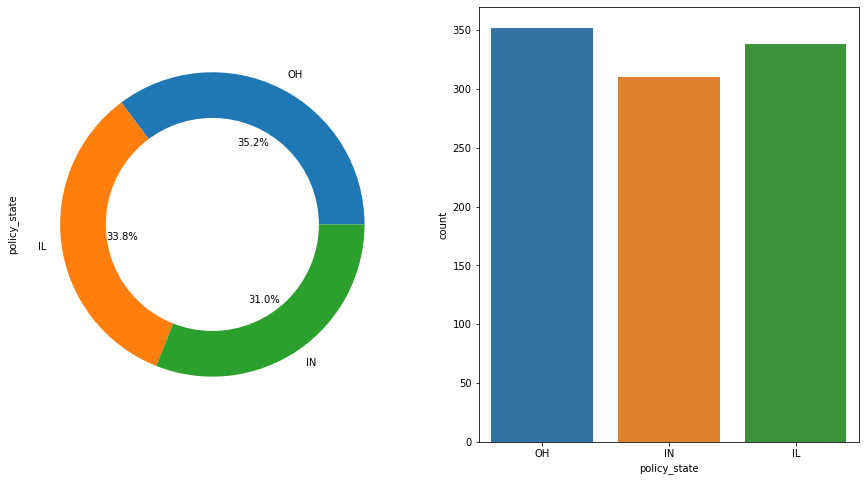

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['policy_state'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='policy_state',data=df)
df['policy_state'].value_counts()

Most of the policies belong from Ohio states while the no. do not vary much in all the categories.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

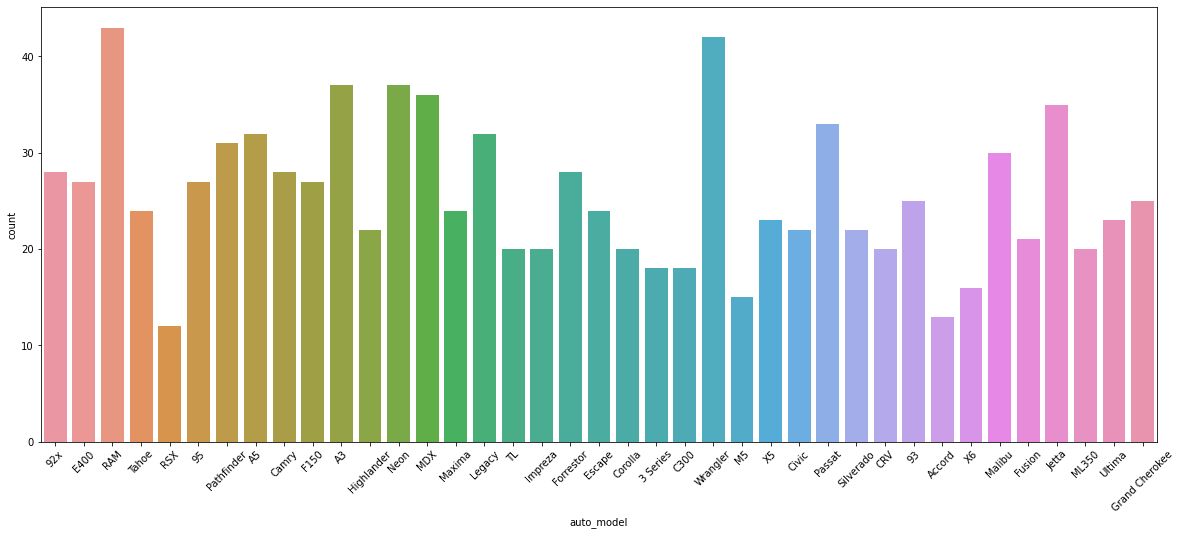

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(x='auto_model',data=df)
plt.xticks(rotation=45)

RAM and Wrangler go through most accidents while RSX has reportes the least no. of incidents.

Minimum 70
Maximum 79560


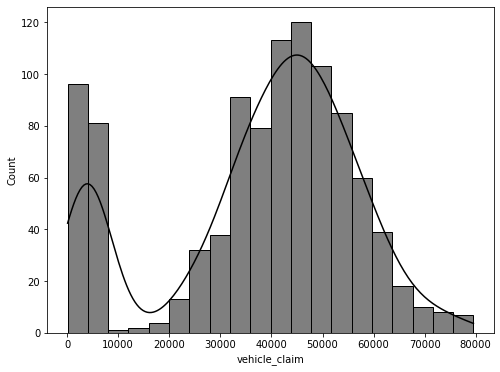

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df['vehicle_claim'],kde=True,color='k')
print('Minimum',df['vehicle_claim'].min())
print('Maximum',df['vehicle_claim'].max())

Minimum vehicle claim is 70 which could be of parking tickets while the major claims lie in the range 40K to 55K. Data is distributed normally with a little skewness to the left.

Minimum 0
Maximum 23670


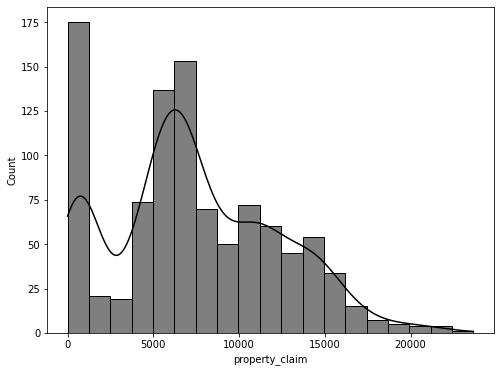

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df['property_claim'],kde=True,color='k')
print('Minimum',df['property_claim'].min())
print('Maximum',df['property_claim'].max())

Data shows right skewness, property claims lie in the range 0 to 23670 while majority of claims in the range 4000 to 9000.

Minimum 0
Maximum 21450


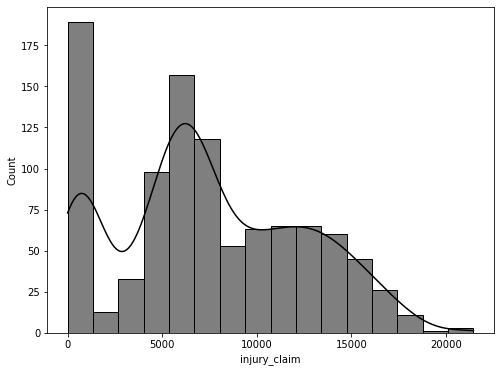

In [36]:
plt.figure(figsize=(8,6))
sns.histplot(df['injury_claim'],kde=True,color='k')
print('Minimum',df['injury_claim'].min())
print('Maximum',df['injury_claim'].max())

Data is skewed to the right side, and has its peak value betweem zero to 1000 while the majority of claims lie in 4000 to 8000 range.

Minimum 100
Maximum 114920


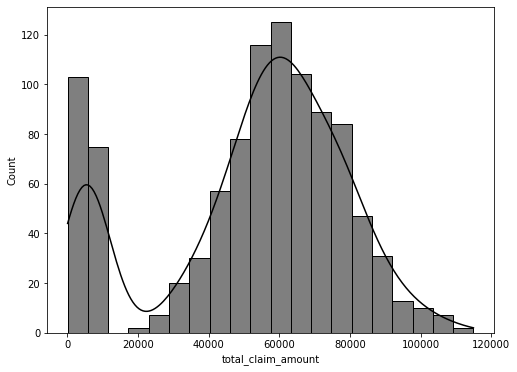

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(df['total_claim_amount'],kde=True,color='k')
print('Minimum',df['total_claim_amount'].min())
print('Maximum',df['total_claim_amount'].max())

Minimum total claim amount is 1000 while maximum total claim amount is 114920, while the majority of claims lie between 5000 to 8000. Data left skewed.

Minimum -111100
Maximum 0


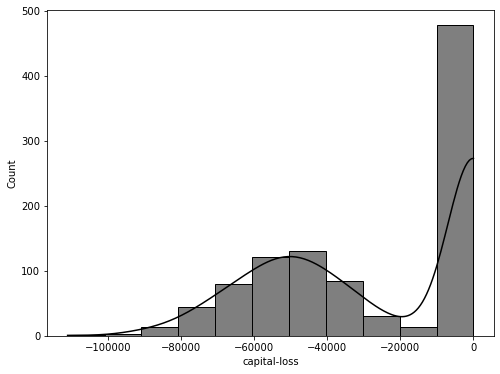

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(df['capital-loss'],kde=True,color='k')
print('Minimum',df['capital-loss'].min())
print('Maximum',df['capital-loss'].max())

Minus sign indicates loss. Maximum capital loss is 111100 and minimum is 0. Data shows left skewness, majority of losses lie in 0 to -1000 range.

Minimum 0
Maximum 100500


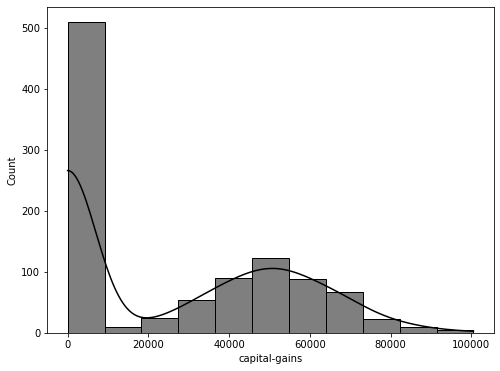

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(df['capital-gains'],kde=True,color='k')
print('Minimum',df['capital-gains'].min())
print('Maximum',df['capital-gains'].max())

Maximum capital gain is 100500 and minimum is 0. Data shows right skewness, majority of gains lie in 0 to 1000 range.

Minimum 430104
Maximum 620962


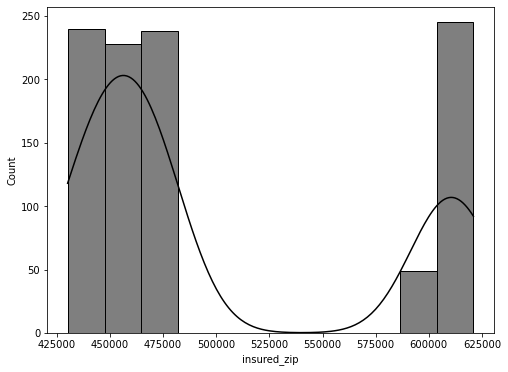

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df['insured_zip'],kde=True,color='k')
print('Minimum',df['insured_zip'].min())
print('Maximum',df['insured_zip'].max())

Insured zip has range from 430104 to 620692 while there are no insured zip between 48000 to 58000, while its majority lies in 430104 to 48000. Data is slightly skewed to the right.

Minimum 433.33
Maximum 2047.59


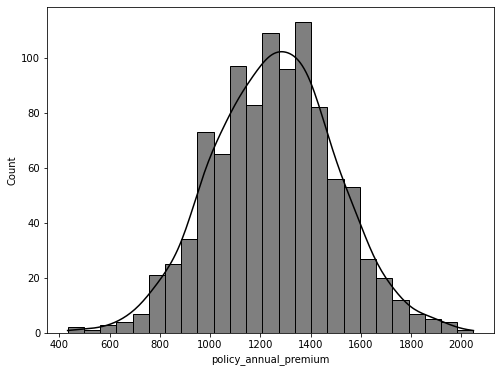

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(df['policy_annual_premium'],kde=True,color='k')
print('Minimum',df['policy_annual_premium'].min())
print('Maximum',df['policy_annual_premium'].max())

Policy annual premium varies from 433.33 to 2047.59 while majority lies in the range 1000 to 1500. Data almost follows gaussian distribution.

Minimum 19
Maximum 64


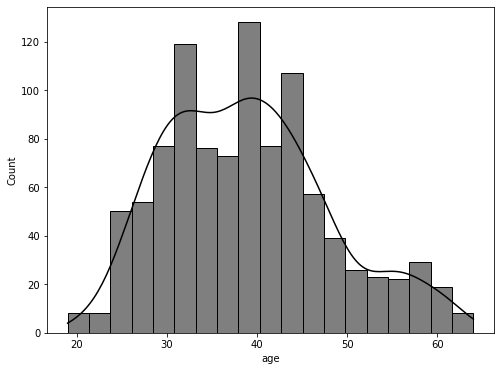

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(df['age'],kde=True,color='k')
print('Minimum',df['age'].min())
print('Maximum',df['age'].max())

Age of insurer varies from 19 to 64 while majority lies in the range 28 to 45. Data is almost normally distributed with little skewness to right

Minimum 0
Maximum 479


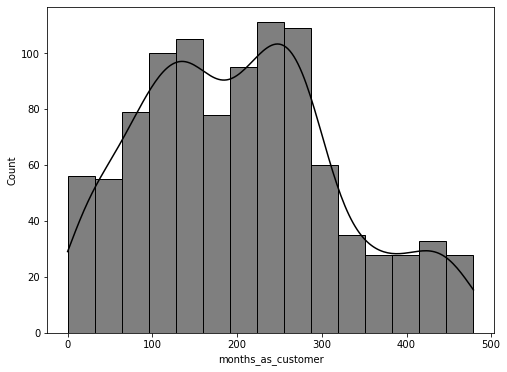

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(df['months_as_customer'],kde=True,color='k')
print('Minimum',df['months_as_customer'].min())
print('Maximum',df['months_as_customer'].max())

MOst of the customers are customer from 100 to 300 months while few have been customers as long as 479 months. Data has little skewness to the right.

In [44]:
r=['policy_number','policy_bind_date','incident_date','auto_model','incident_location']

In [45]:
for i in r:
    cont.remove(i)

In [46]:
len(cont)

10

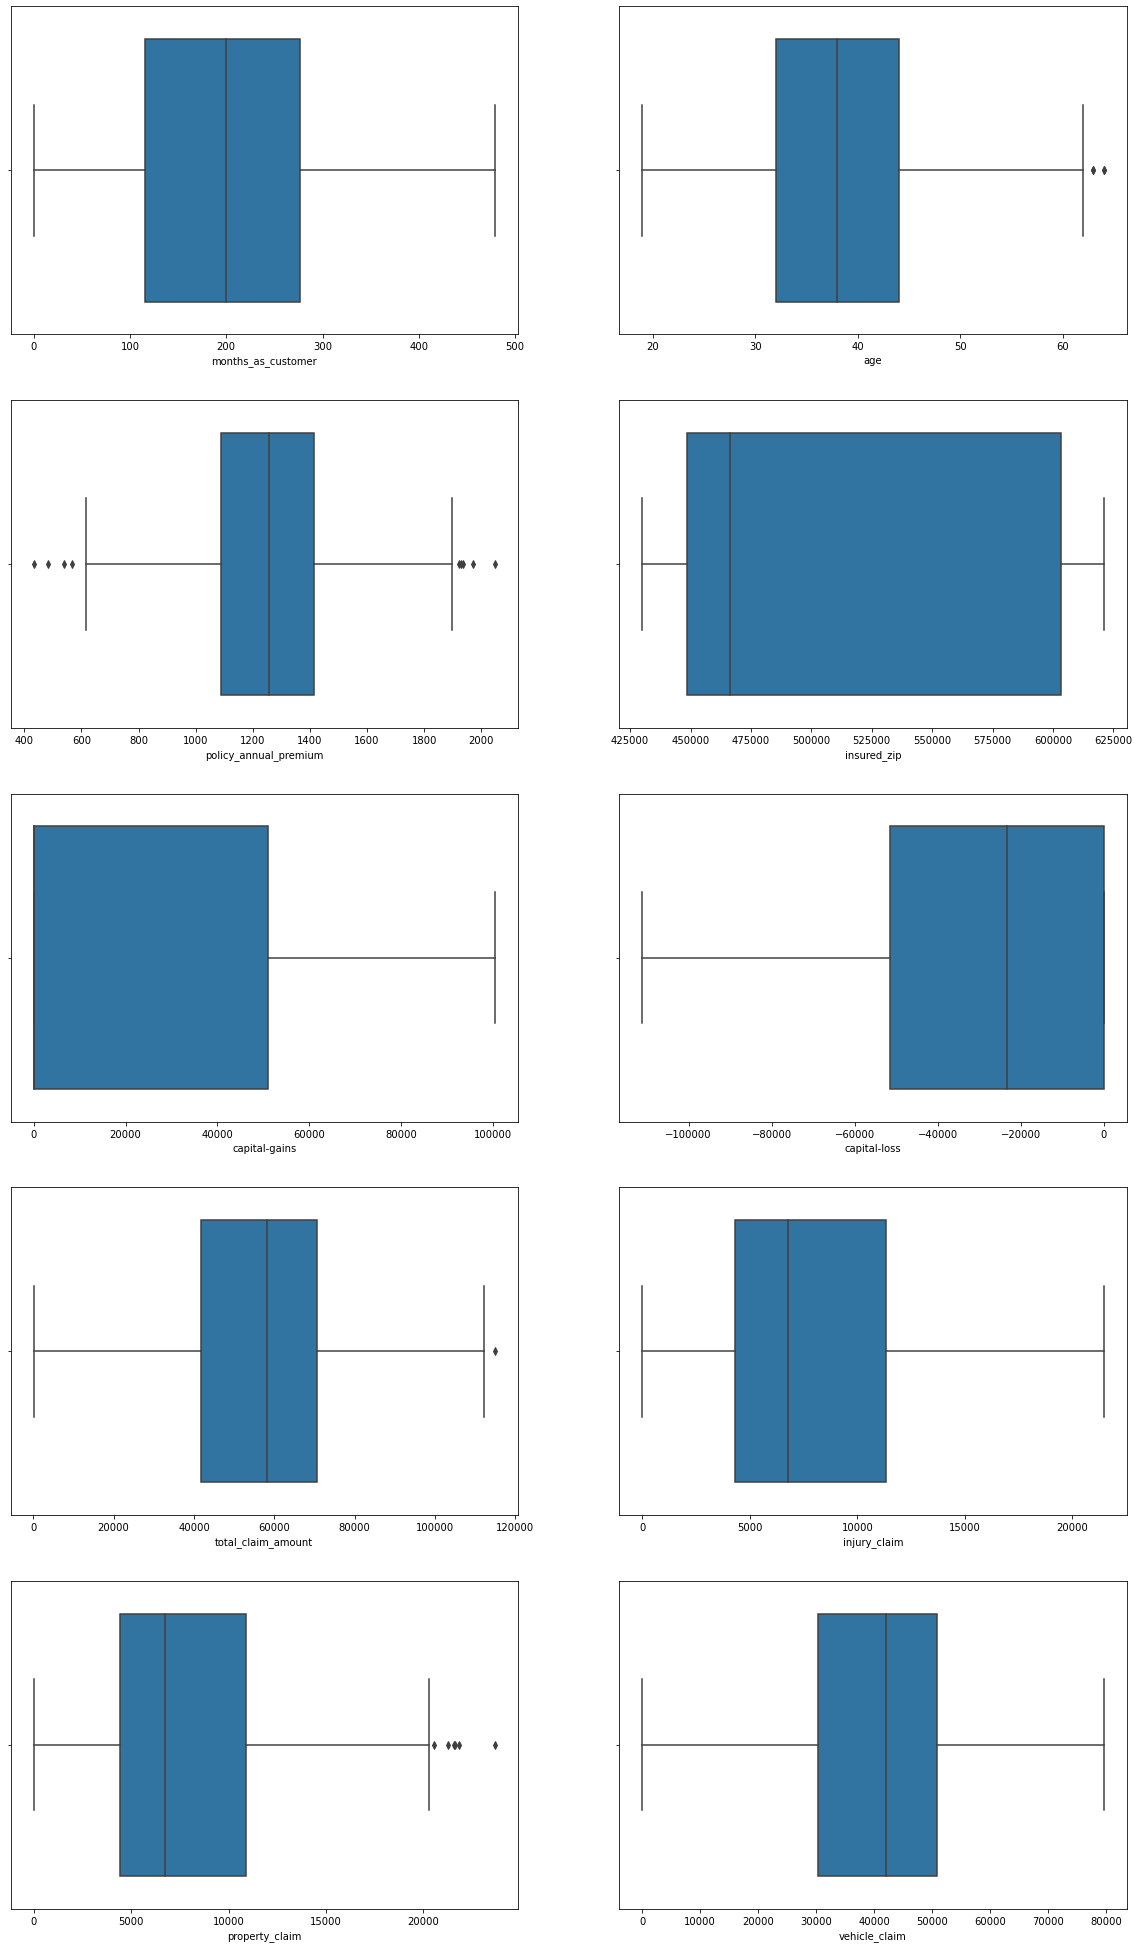

In [47]:
fig,ax=plt.subplots(5,2,figsize=(20,35))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],ax=ax[r,c])
    c+=1

There are few outliers in policy annual premium, and very few in total claim amount and property claim. 

### Bivariate Analysis

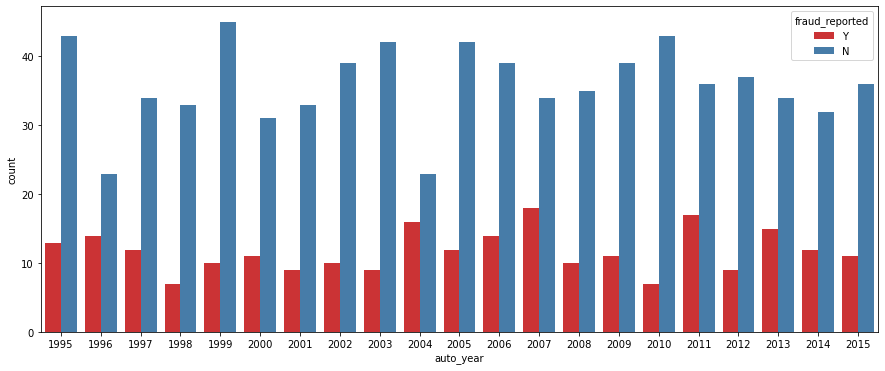

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(df['auto_year'],hue=df['fraud_reported'],palette='Set1')

Highest fraudulent insurance claim ratio was done with cars made in 2004 followed by 1996, there is no trend that most fraudulent claims are made on new cars or on old cars. 

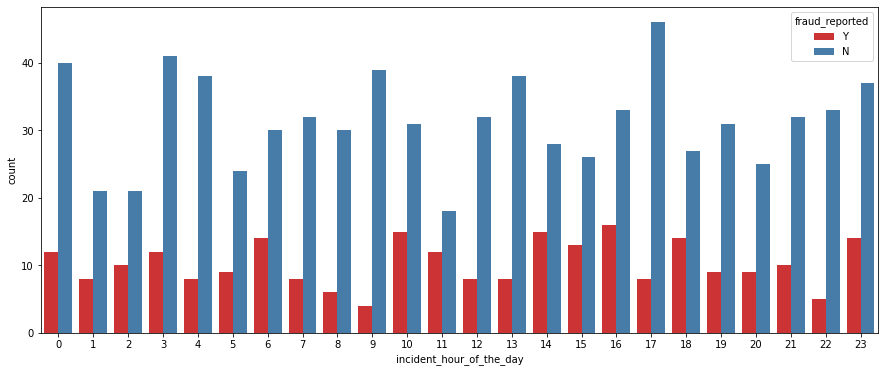

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(df['incident_hour_of_the_day'],hue=df['fraud_reported'],palette='Set1')

Highest fraudulent insurance claim ratio was done at 11 am. There is no trend that most fraudulent claims accidents happen at night time or at day time.

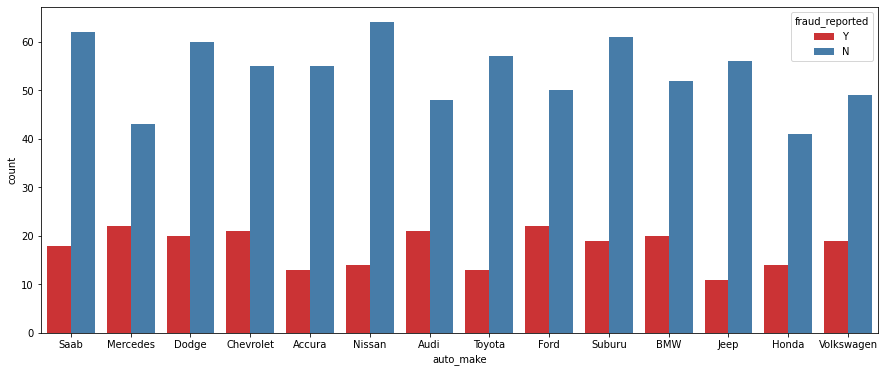

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(df['auto_make'],hue=df['fraud_reported'],palette='Set1')

Highest fraudulent insurance claim was seen to be carried out in mercedes, which could be because it is expensive, least was reported in Nissan.

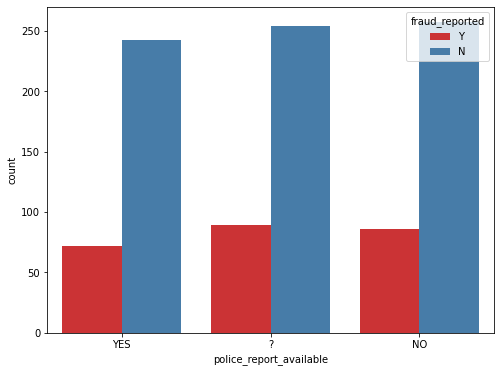

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(df['police_report_available'],hue=df['fraud_reported'],palette='Set1')

There is no sign that when a fraudulent insurance claim is made without police report as there are fraudulent cases even after contacting the police.

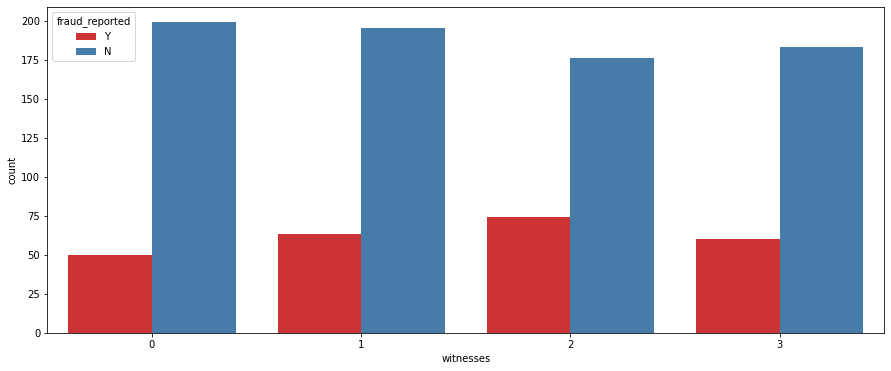

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(df['witnesses'],hue=df['fraud_reported'],palette='Set1')

Fraudulent cases are present when there are 0 witnesses or as many as 3 witnesses, while highest fraudulent raio is seen when the number of witnesses are 2.

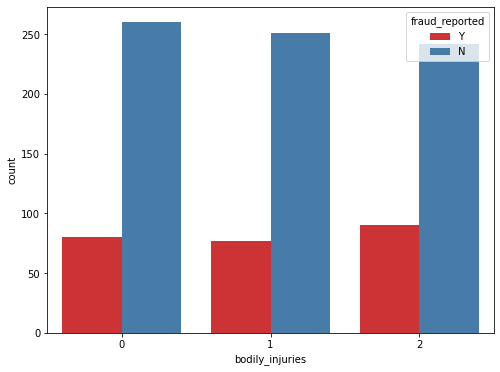

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'],palette='Set1')

Highest fraudulent raio is seen when the number of bodily injuries are 2 while the vaiance is not nuch in all the categories.

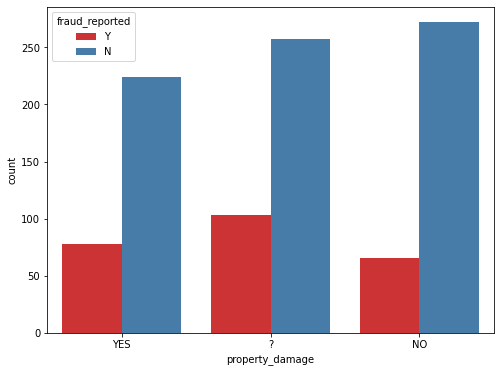

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(df['property_damage'],hue=df['fraud_reported'],palette='Set1')

In most of the cases data is missing which could meanit was a theft or parking fraud.

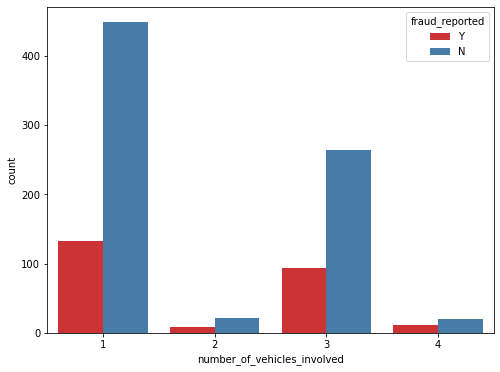

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(df['number_of_vehicles_involved'],hue=df['fraud_reported'],palette='Set1')

Most fraudulent cases are seen when no. of vehicles involved is one while the highest ratio of fraudulent reports is highest when number is 3.

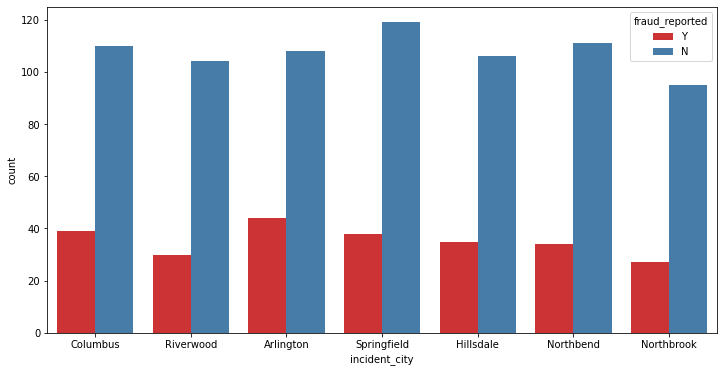

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(df['incident_city'],hue=df['fraud_reported'],palette='Set1')

Highest ratio of fraudulent reports is seen in Arlington city while least in Northbrook.

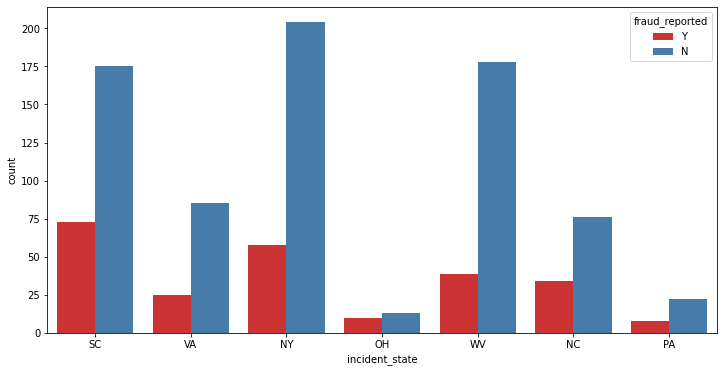

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(df['incident_state'],hue=df['fraud_reported'],palette='Set1')

Ohio has the least no. of incidents but most of it are fraudulent. 

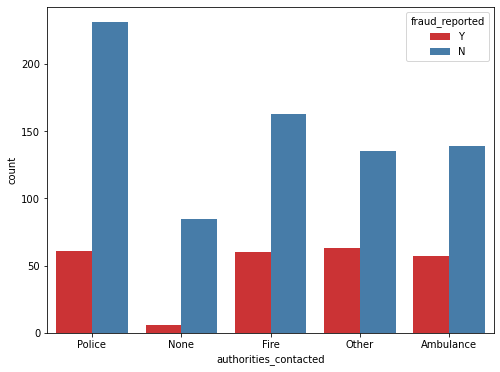

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(df['authorities_contacted'],hue=df['fraud_reported'],palette='Set1')

Fraudulent cases are least when none of the authorities are contacted. It is seen that even in fraudulent cases police is contacted.

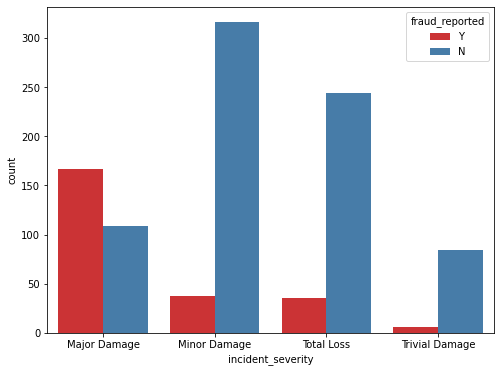

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(df['incident_severity'],hue=df['fraud_reported'],palette='Set1')

Highest fraudulent cases are reported when there is some major damage, which is quite logical as fraudulent claims are high.

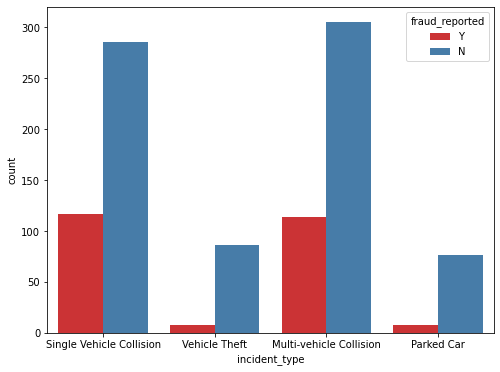

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(df['incident_type'],hue=df['fraud_reported'],palette='Set1')

Fraudulent cases are least when there is vehicle theft or parked car incident, while highest when there is collisions betweens vehicles.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

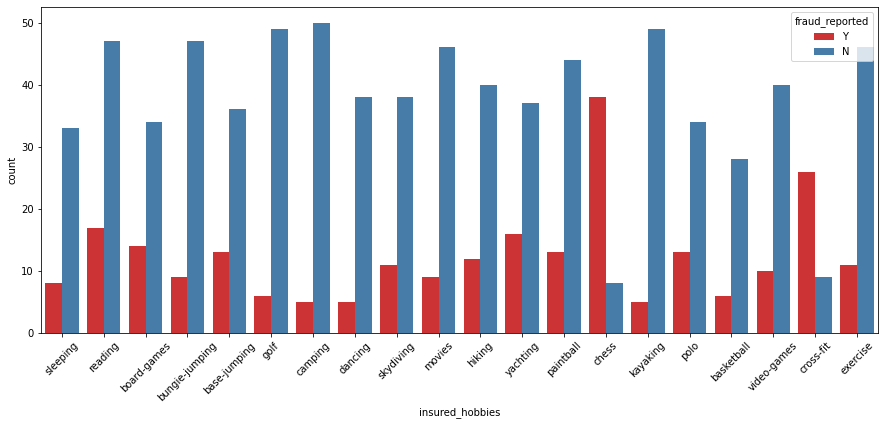

In [61]:
plt.figure(figsize=(15,6))
sns.countplot(df['insured_hobbies'],hue=df['fraud_reported'],palette='Set1')
plt.xticks(rotation=45)

When the hobby provided is chess or cross-fit, then most of the incidents turn out to be fraud.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

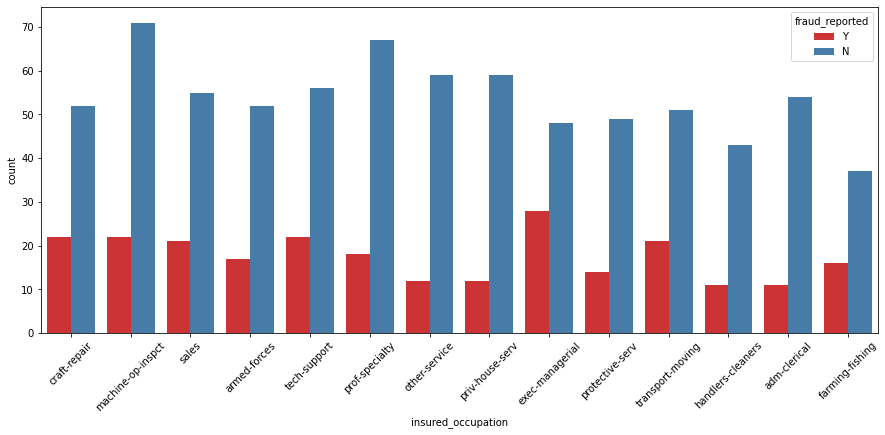

In [62]:
plt.figure(figsize=(15,6))
sns.countplot(df['insured_occupation'],hue=df['fraud_reported'],palette='Set1')
plt.xticks(rotation=45)

Exec Managerial has the highest fraud insurance claim ratio, while it is seen be it any profession fruad is carried out by all of them

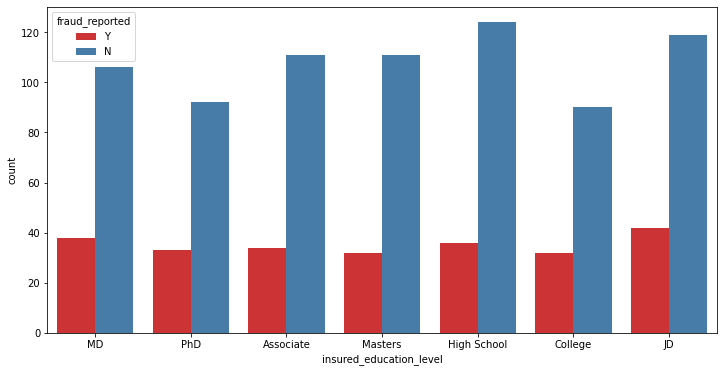

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(df['insured_education_level'],hue=df['fraud_reported'],palette='Set1')

People with every insured education level has carried out fraudulent claims be it PHD or just high school.

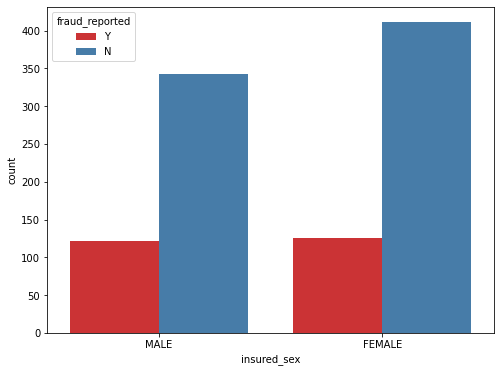

In [64]:
plt.figure(figsize=(8,6))
sns.countplot(df['insured_sex'],hue=df['fraud_reported'],palette='Set1')

Females are not behind men be it any position, even at fraudulent claims women has surpassed men. While the highest fraudulemt claim ratio is still greater in males.

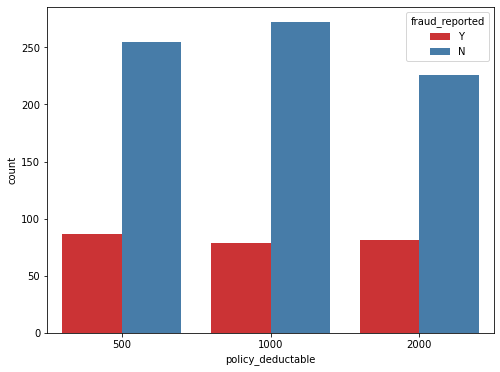

In [65]:
plt.figure(figsize=(8,6))
sns.countplot(df['policy_deductable'],hue=df['fraud_reported'],palette='Set1')

Highest ratio of fraud claims belong to the 2000 category of policy deductable, while there is not diff between each category.

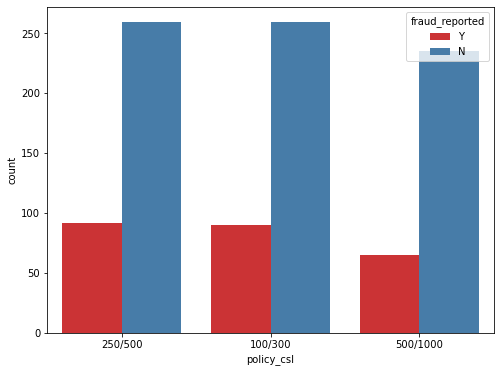

In [66]:
plt.figure(figsize=(8,6))
sns.countplot(df['policy_csl'],hue=df['fraud_reported'],palette='Set1')

All the policy csl have almost same ratio while fraudulent claims are little less in 500/1000 category.

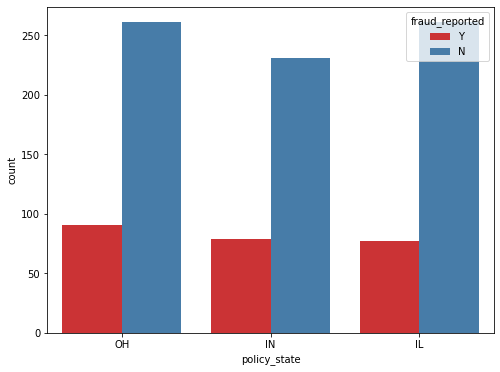

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(df['policy_state'],hue=df['fraud_reported'],palette='Set1')

Highest fraudulent claims are from policy belonging to the IN state while least from IL state.

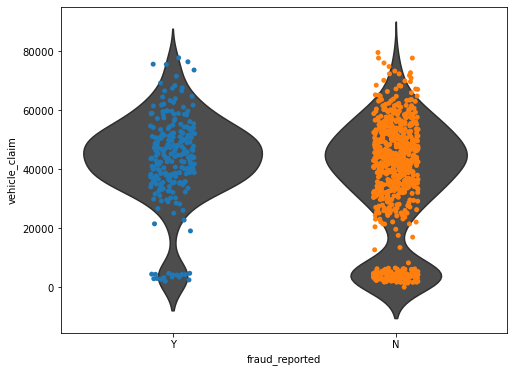

In [68]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='vehicle_claim', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='vehicle_claim', data=df)

Fraudulent claims have high density for vehicle claim in the range 4000 to 5000 while genuine claims seem to be distributed. There are way less no. of fraudulent claims when the vehicle claim amount is less.

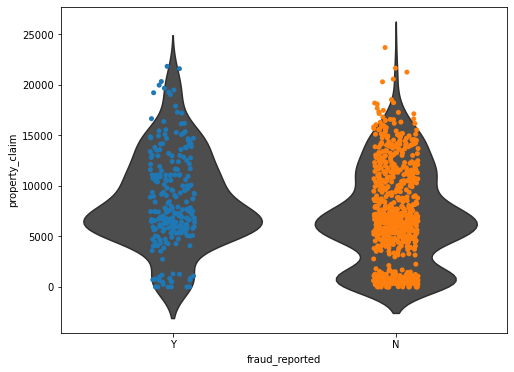

In [69]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='property_claim', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='property_claim', data=df)

There is very less no. of fraudulent claims in range 0 to 1000 compared to genuine ones. Fraudulent claim seem to have highest density at 5000 to 7000.

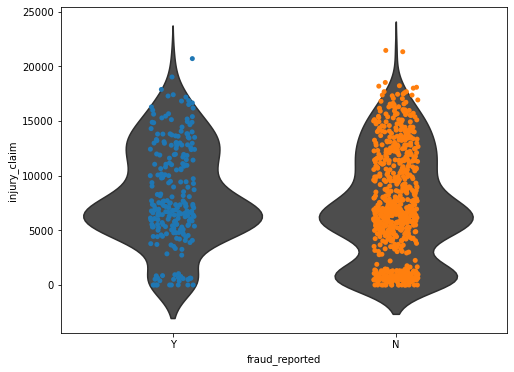

In [70]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='injury_claim', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='injury_claim', data=df)

There is very less no. of fraudulent claims in range 0 to 1000 compared to genuine ones. As the injury claim increases fraudulent claims to increase with highest density at 4000 to 7000

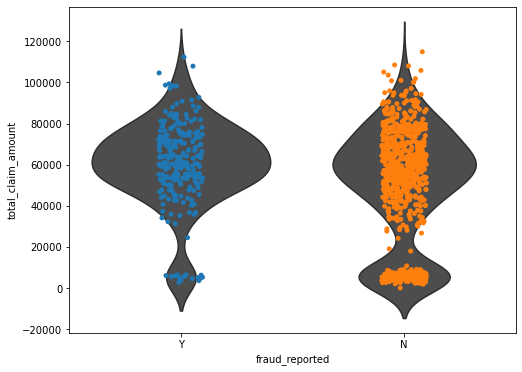

In [71]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='total_claim_amount', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='total_claim_amount', data=df)

When the total claim amount is less fraudulent claims are also less but there is a high density of fraudulent claims at 4000 to 8000, while genuine claims seem to be distributed.

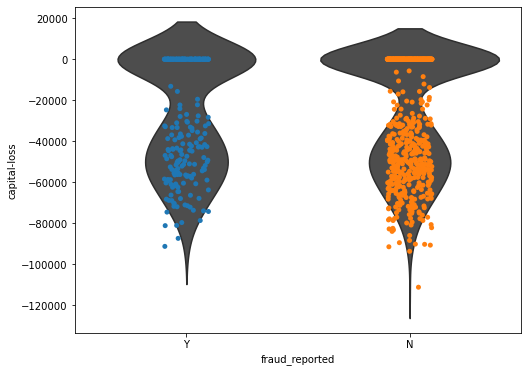

In [72]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='capital-loss', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='capital-loss', data=df)

There is no direct relation between capital loss and fraud claims but there is way less fraud claims when capital loss is zero as the capital loss increases, density of fraudulent claims and genuine claims become equal.

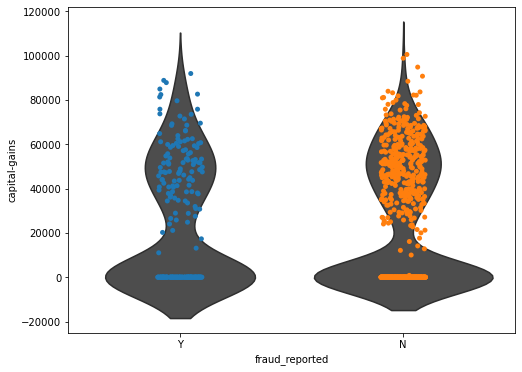

In [73]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='capital-gains', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='capital-gains', data=df)

When the capital loss is low, then there are more no. of fraudulent claims, as the capital loss increases, density of of fraudulent claims decreases.

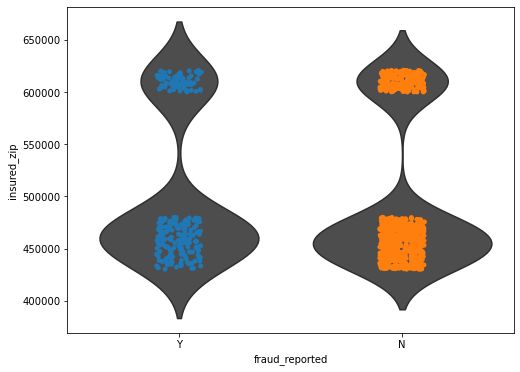

In [74]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='insured_zip', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='insured_zip', data=df)

Insured zip does not alone differentites between the fraud and genuine claims. 

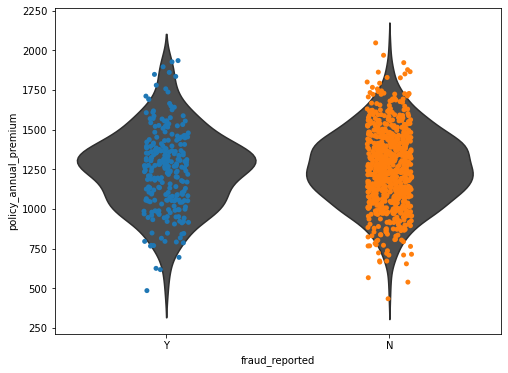

In [75]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='policy_annual_premium', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='policy_annual_premium', data=df)

Highest fraudulent claims are reported when policy annual premium is in the range 1200 to 1400 while the desnity decreases as we move up or below this range when compared to genuine claims.

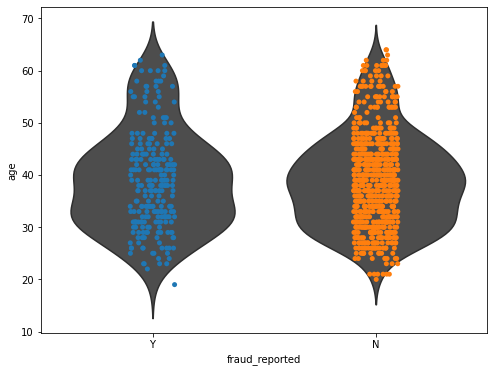

In [76]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='age', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='age', data=df)

Highest fraud claims are reported in the age range 30 to 35, whereas age does not matter much in this type of crime also density seems to be higher at 50 to 60 age range in fraudulent claims compared to genuine ones.

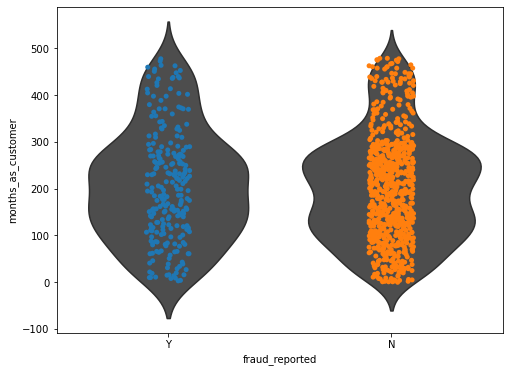

In [77]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='fraud_reported', y='months_as_customer', data=df,inner=None, color='.3')
ax = sns.stripplot(x='fraud_reported', y='months_as_customer', data=df)

Even thisfeature does not matter much as new customers as well as old ones all seem to have been reported as fraud claims. While there is high density in fraud claims compared to genuine ones after 350 months.

### Multivariate Analysis

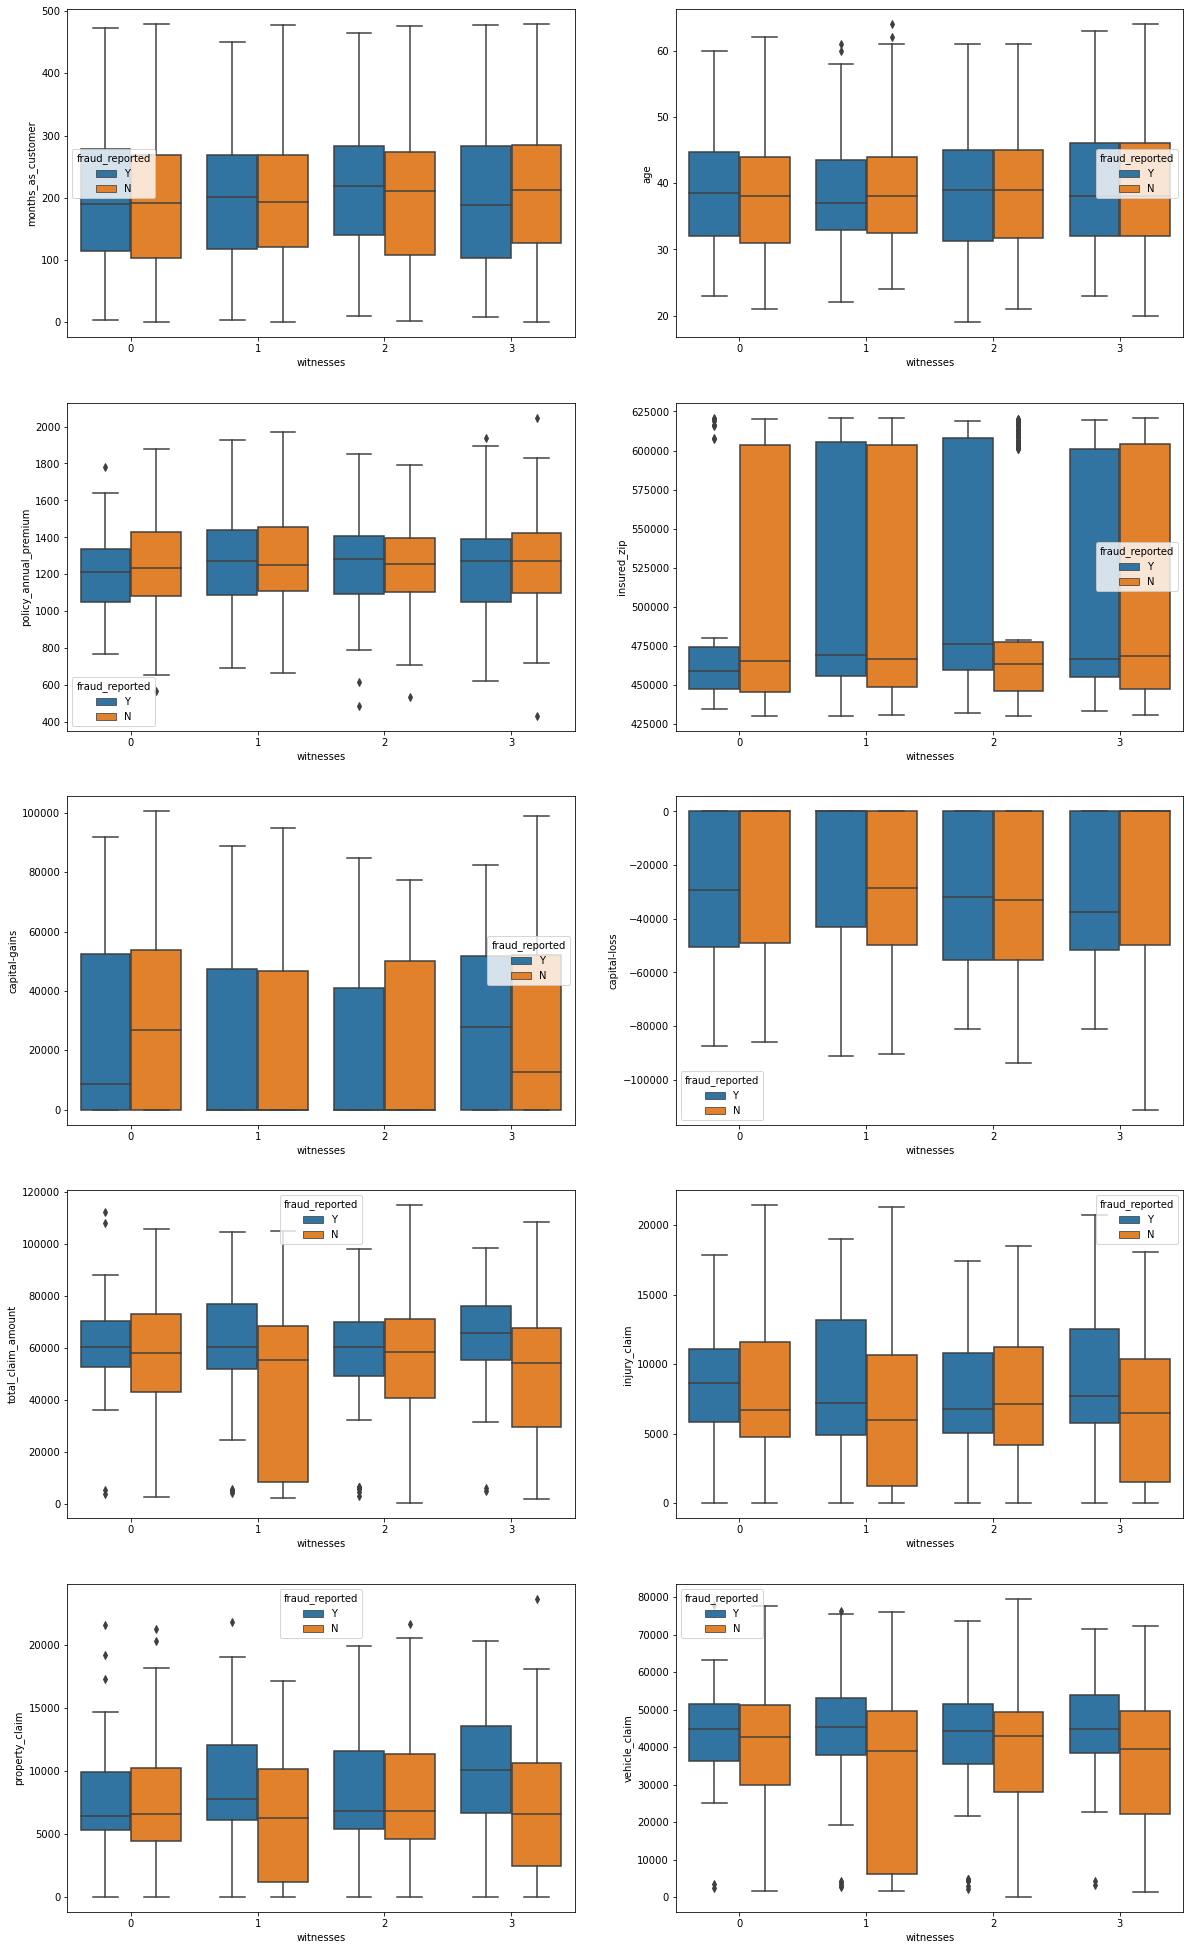

In [78]:
fig,ax=plt.subplots(5,2,figsize=(20,35))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(x='witnesses',y=n,hue='fraud_reported',data=df,ax=ax[r,c])
    c+=1

Be it property claim, injury claim, vehicle claim or total amount claim, in fraudulent claim these amounts are seem to be higher, be it any number of witnesses. It is also to be noticed that insured zip is high when the no. of witnesses are 2 in case of fraudulent claims.

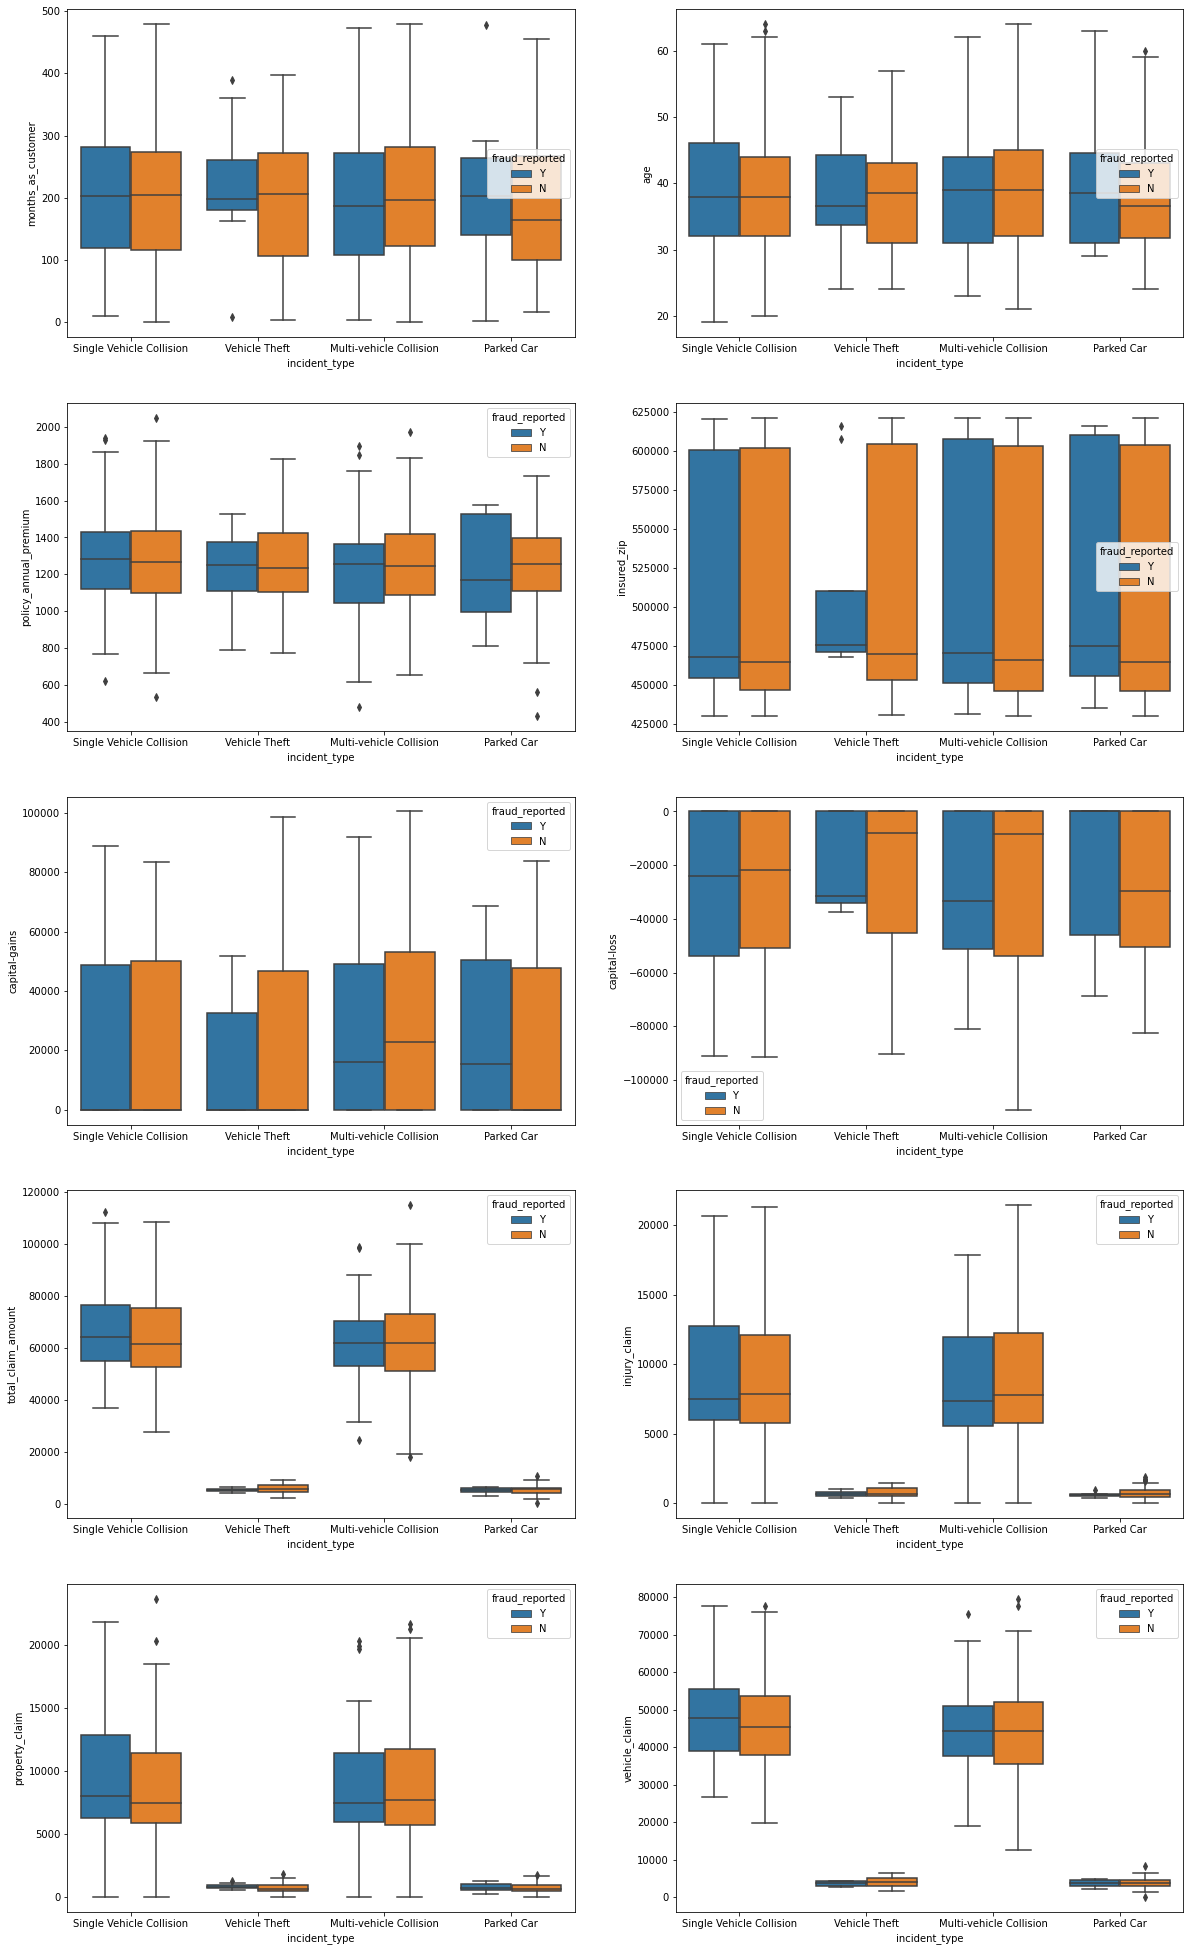

In [79]:
fig,ax=plt.subplots(5,2,figsize=(20,35))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(x='incident_type',y=n,hue='fraud_reported',data=df,ax=ax[r,c])
    c+=1

Be it property claim, injury claim, vehicle claim or total amount claim, they are very low when incident type is vehicle theft or car parked. Insured zip is quite low when there is fraudulent claim of theft vehicle.

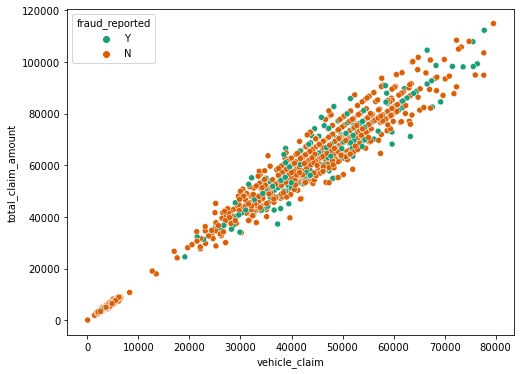

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='vehicle_claim',y='total_claim_amount',hue='fraud_reported',data=df,palette='Dark2')

There seems to be high dependency between total claim and vehicle claim. There seem to be very less cases of frauds when vehicle claim and total claim is very low. Fraudulent cases seem to inclrease as the cehicle claim imcreases 2000 and total claim increases 4000.

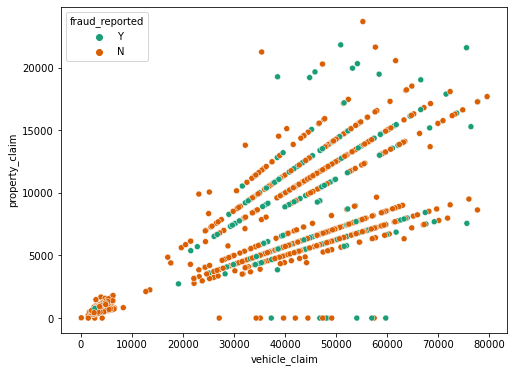

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='vehicle_claim',y='property_claim',hue='fraud_reported',data=df,palette='Dark2')

There seems to be high dependency between vehicle claim and property claim. There seem to be very less cases of frauds when vehicle claim and property claim is very low, There are cases of insurance claim when there is vehicle claim but not vice versa.

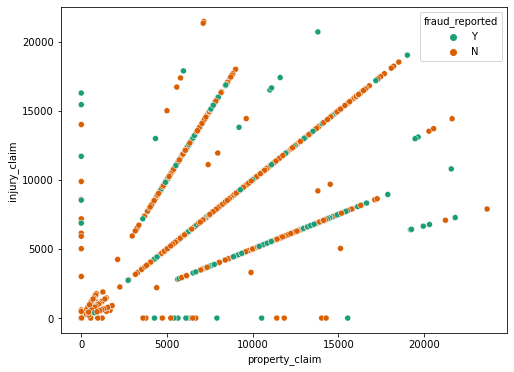

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='property_claim',y='injury_claim',hue='fraud_reported',data=df,palette='Dark2')

There seems to be high dependency between injury claim and property claim, There seem to be very less cases of frauds when unjury claim and property claim is very low, also it is seen that there are more cases of fraudulent claims when property claim is more compared to injury claim.

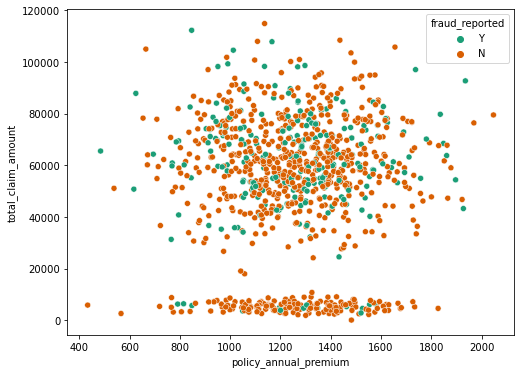

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='policy_annual_premium',y='total_claim_amount',hue='fraud_reported',data=df,palette='Dark2')

There is very low cases of fraudulent claims when total claim amount is low. There are more cases of fraudulent claims when policy annual premium is low. It is also seen that as there is not much dependence between policy annual premium and total claim amount.

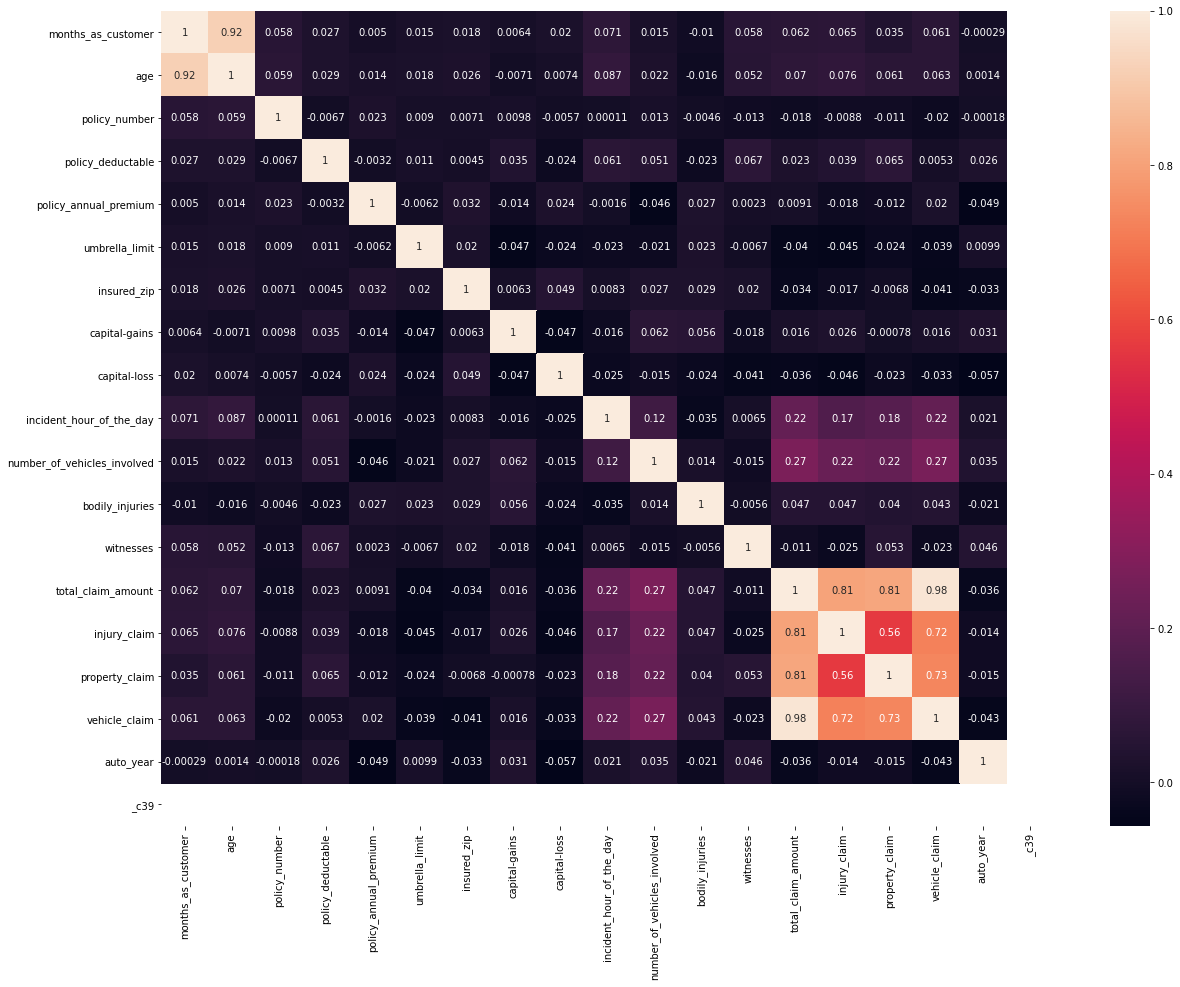

In [84]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

There is high correlation between total claim amount, injury claim property claim and vehicle claim as these features are inter related to each other. There is also high correaltion between months as customer and age. 

# Pre-Processing Pipeline

##### Removing Identifier and null columns

In [85]:
df.drop(['_c39','policy_number','incident_location'],axis=1,inplace=True)

##### Imputing Null(?) Values

In [86]:
from scipy.stats import mode

Collision Type

In [87]:
df[['incident_type']][df['collision_type']=='?'].head(20)

,incident_type
1,Vehicle Theft
4,Vehicle Theft
13,Parked Car
26,Parked Car
27,Vehicle Theft
37,Parked Car
48,Vehicle Theft
51,Vehicle Theft
52,Vehicle Theft
54,Parked Car


From above information we find out that collision type = ? when there is an incident of vehicle theft or parked car hence this does not seem to be a missing value and we will leave it to be as it is.

Propery Damage

In [88]:
df['property_damage'].replace('?',np.NaN,inplace=True)

In [89]:
#Creating pivot table to help fill nan values of Property damage from here
table = df.pivot_table(values='property_damage', index='incident_type', columns='authorities_contacted', aggfunc=mode)
table

authorities_contacted,Ambulance,Fire,None,Other,Police
incident_type,,,,,
Multi-vehicle Collision,"([NO], [38])","([NO], [47])",NaN,"([YES], [30])","([YES], [38])"
Parked Car,NaN,NaN,"([NO], [21])",NaN,"([NO], [10])"
Single Vehicle Collision,"([YES], [35])","([YES], [38])",NaN,"([NO], [37])","([NO], [33])"
Vehicle Theft,NaN,NaN,"([NO], [13])",NaN,"([NO], [21])"


In [90]:
def find(x):
    return table.loc[x['incident_type'], x['authorities_contacted']][0][0]

df['property_damage'].fillna(df[df['property_damage'].isnull()].apply(find, axis=1), inplace=True)

Police report available

In [91]:
df[df['police_report_available']=='?'].head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,YES,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,26-05-2002,OH,100/300,500,1253.12,4000000,462283,FEMALE,Masters,exec-managerial,dancing,other-relative,38400,0,06-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,NY,Northbend,22,1,YES,2,2,?,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,MALE,JD,other-service,bungie-jumping,own-child,0,0,01-01-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,20,3,NO,1,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N


In [92]:
df['police_report_available'].replace('?',np.NaN,inplace=True)

In [93]:
#Creating pivot table to help fill nan values of Police report available from here
table = df.pivot_table(values='police_report_available', index='incident_type', columns='authorities_contacted', aggfunc=mode)
table

authorities_contacted,Ambulance,Fire,None,Other,Police
incident_type,,,,,
Multi-vehicle Collision,"([NO], [37])","([NO], [43])",NaN,"([YES], [34])","([YES], [37])"
Parked Car,NaN,NaN,"([NO], [20])",NaN,"([NO], [17])"
Single Vehicle Collision,"([NO], [37])","([YES], [38])",NaN,"([YES], [35])","([YES], [36])"
Vehicle Theft,NaN,NaN,"([NO], [16])",NaN,"([NO], [19])"


In [94]:
def find(x):
    return table.loc[x['incident_type'], x['authorities_contacted']][0][0]

df['police_report_available'].fillna(df[df['police_report_available'].isnull()].apply(find, axis=1), inplace=True)

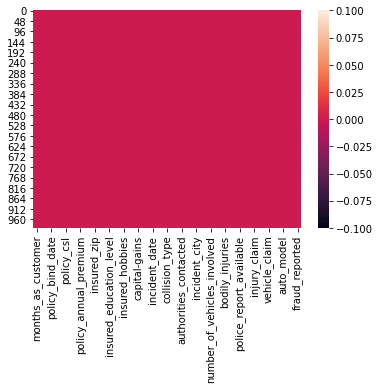

In [95]:
sns.heatmap(df.isnull())

No null values remain.

##### Handling date columns

In [96]:
#Extracting year month and day from policy bind date
df['policy_bind_year']=2016-pd.to_datetime(df['policy_bind_date']).dt.year #substracting year from 2016 as highest year present is 2015
df['policy_bind_month']=pd.to_datetime(df['policy_bind_date']).dt.month
df['policy_bind_day']=pd.to_datetime(df['policy_bind_date']).dt.day

#Converting year and month into days
df['policy_bind_time_in_days']=df['policy_bind_day']+(df['policy_bind_month']*30)+(df['policy_bind_year']*365)

In [97]:
#Extracting year month and day from incident date
df['incident_date_year']=2016-pd.to_datetime(df['incident_date']).dt.year #substracting year from 2016 as highest year present is 2015
df['incident_date_month']=pd.to_datetime(df['incident_date']).dt.month
df['incident_date_day']=pd.to_datetime(df['incident_date']).dt.day

#Converting year and month into days
df['incident_time_in_days']=df['incident_date_day']+(df['incident_date_month']*30)+(df['incident_date_year']*365)

In [98]:
#Dropping unncessary columns
df.drop(['policy_bind_date','policy_bind_year','policy_bind_month','policy_bind_day','incident_date',
         'incident_date_year','incident_date_month','incident_date_day'],axis=1,inplace=True)

In [99]:
#Creating another column by counting days from policy bind time to incident time
df['days_between_bind_and_incident']=df['policy_bind_time_in_days']-df['incident_time_in_days']

##### Encoding

In [100]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
l=LabelEncoder()
o=OrdinalEncoder()

In [101]:
#Using ordinal encoder to encode independent features
for i in df.columns:
    if df[i].dtypes=='O' and i!='fraud_reported':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

#Using label encoder to encode label column
df['fraud_reported']=l.fit_transform(df['fraud_reported'])

##### Removing Outliers

In [102]:
from scipy.stats import zscore

In [103]:
#Method to find optimum threshold
def threshold():
    for i in np.arange(3,5,0.2):
        data=df.copy()
        data=data[(z<i).all(axis=1)]
        loss=(df.shape[0]-data.shape[0])/df.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [104]:
z=np.abs(zscore(df))
threshold()

With threshold 3.0 data loss is 2.0%
With threshold 3.2 data loss is 1.0%
With threshold 3.4 data loss is 0.7%
With threshold 3.6 data loss is 0.2%
With threshold 3.8 data loss is 0.2%
With threshold 4.0 data loss is 0.0%
With threshold 4.2 data loss is 0.0%
With threshold 4.4 data loss is 0.0%
With threshold 4.6 data loss is 0.0%
With threshold 4.8 data loss is 0.0%


We do not remove outliers as there are only 2% outliers which will not affect the data much

##### Removing Skewness

In [105]:
#using Power transformer to remove skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [106]:
for i in cont:
    if np.abs(df[i].skew())>0.5 and i!='insured_zip':
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

In [107]:
df['insured_zip']=np.log(df['insured_zip'])

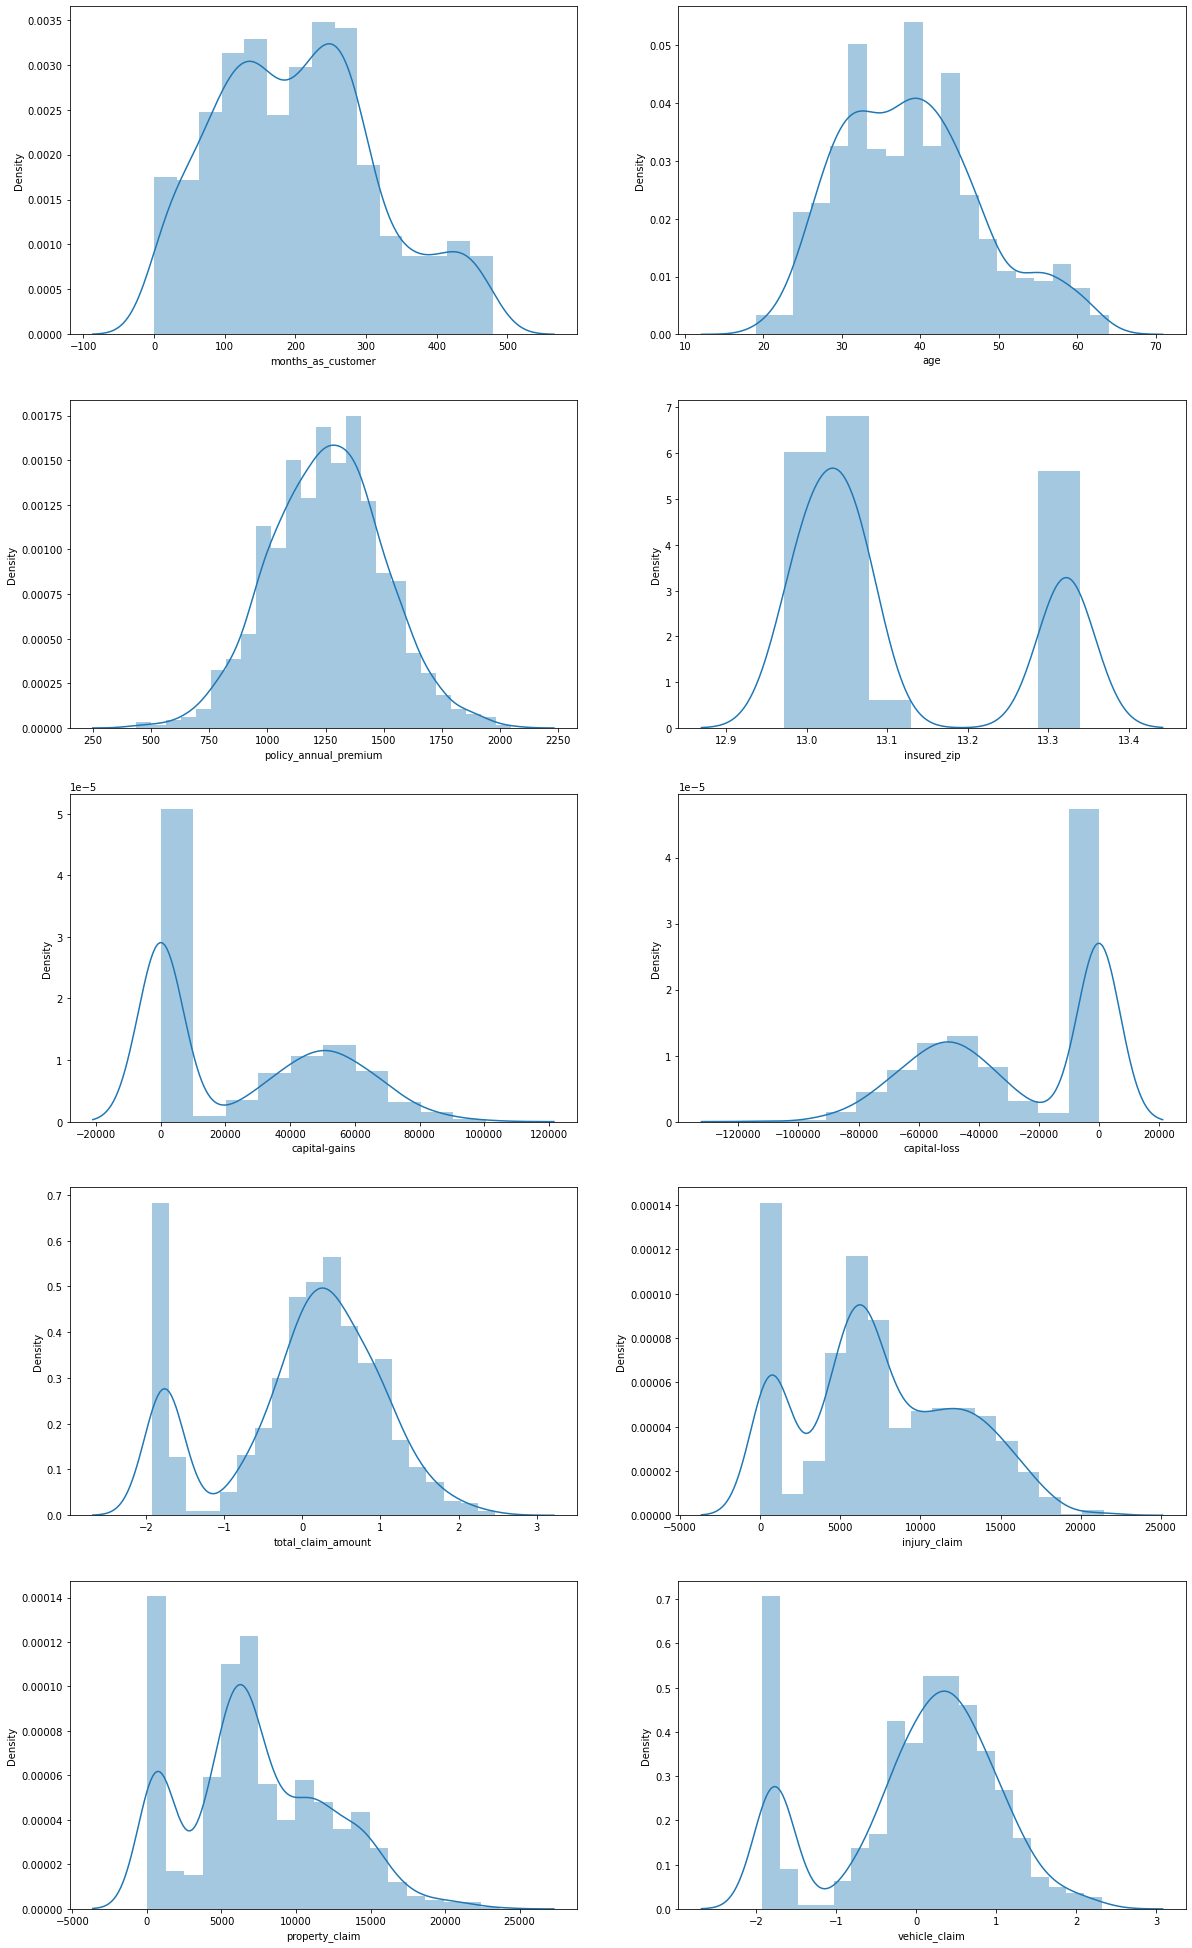

In [108]:
fig,ax=plt.subplots(5,2,figsize=(20,35))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

Skewness has reduced to a considerable extent.

##### Separating dependent and independent features

In [109]:
x=df.copy()
x.drop('fraud_reported',axis=1,inplace=True)
y=df['fraud_reported']

##### Handling Imbalanced Data

In [110]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [111]:
x,y=over.fit_resample(x,y)

1    753
0    753
Name: fraud_reported, dtype: int64

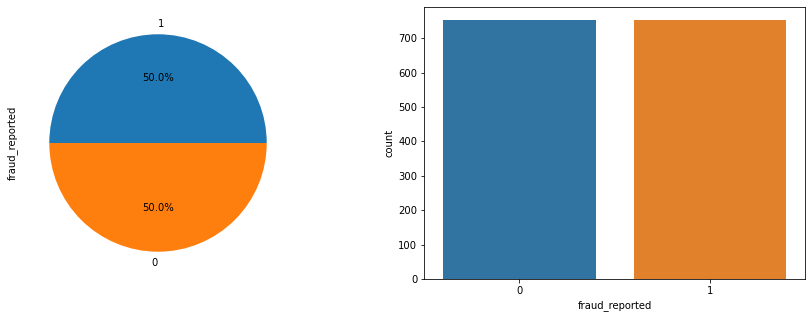

In [112]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

Dataset now appears to be balanced.

##### Scaling the data

In [113]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [114]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Model Building

Importing necessary libraries

In [115]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [116]:
from sklearn.model_selection import train_test_split, cross_val_score

In [117]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [118]:
#Function to find the best random state
def randomstate(x,y):
    maxx=0
    model=DecisionTreeClassifier()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [119]:
#To evaluate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [120]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [121]:
#Creates and trains model from the models list
def createmodel(x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    for i in models:
        model=i
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,ytest,model,xtest,score) 

In [122]:
createmodel(x,y)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7401
----------------------------------------------------------
Mean of Cross Validation Score 0.7279
----------------------------------------------------------
AUC_ROC Score 0.8447
----------------------------------------------------------
Confusion Matrix
[[129  28]
 [ 70 150]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       157
           1       0.84      0.68      0.75       220

    accuracy                           0.74       377
   macro avg       0.75      0.75      0.74       377
weighted avg       0.76      0.74      0.74       377

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.6207
----------------------------------------------------------
Mean of Cross Validation Score 0.6481
---

Models Giving the highest Accuracy and least miss classification are random forest, gradient boost and extreme gradient boost.

# Feature Selection

##### Using Feature importance of Extra Trees Classifier

In [123]:
from sklearn.tree import ExtraTreeClassifier
m=ExtraTreeClassifier()
m.fit(x,y)

ExtraTreeClassifier()

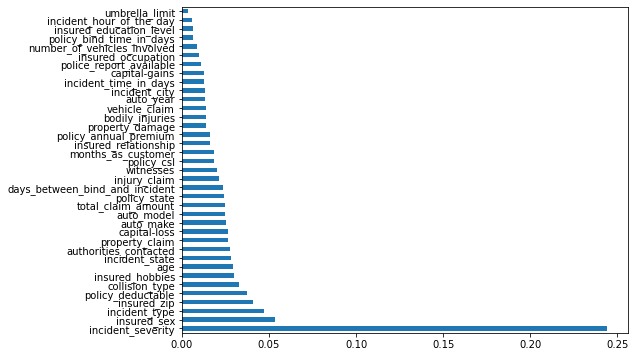

In [124]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(m.feature_importances_, index=x.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(len(x.columns)).plot(kind='barh')
plt.show()

##### Using chi2 test

In [125]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [126]:
selection = SelectKBest(score_func=chi2)
fit = selection.fit(x,y)

In [127]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores

,Features,Score
0,months_as_customer,0.000136
1,age,0.117929
2,policy_state,0.098040
3,policy_csl,1.068434
4,policy_deductable,1.113406
5,policy_annual_premium,0.123136
6,umbrella_limit,2.171693
7,insured_zip,0.377663
8,insured_sex,1.146000
9,insured_education_level,0.000088


In [128]:
print(featureScores.nlargest(len(x.columns),'Score'))  
feat=list(featureScores.nlargest(len(x.columns),'Score')['Features'])

                          Features      Score
17               incident_severity  97.887845
24                 bodily_injuries   7.040135
30                   vehicle_claim   6.662328
27              total_claim_amount   6.140498
29                  property_claim   5.100498
16                  collision_type   4.978571
28                    injury_claim   2.922682
23                 property_damage   2.873724
6                   umbrella_limit   2.171693
15                   incident_type   1.765293
19                  incident_state   1.747252
25                       witnesses   1.373511
20                   incident_city   1.324578
8                      insured_sex   1.146000
4                policy_deductable   1.113406
3                       policy_csl   1.068434
22     number_of_vehicles_involved   1.001150
18           authorities_contacted   0.940046
11                 insured_hobbies   0.534971
31                       auto_make   0.523752
35           incident_time_in_days

In [129]:
#We create a function to test the performance of dataset after removing above features.
#We use Random Forest and XGBClassifier as our models to test as they were giving the best results.
def feature_test(xtrain,xtest,ytrain,ytest):
    model=RandomForestClassifier()
    model.fit(xtrain,ytrain)
    score=cross_val_score(model,xd,y,cv=10)
    p=model.predict(xtest)
    print("Random Forest")
    print('Accuracy Score',accuracy_score(p,ytest))
    print('Cross Validation Score',score.mean())
    model=XGBClassifier()
    model.fit(xtrain,ytrain)
    score=cross_val_score(model,xd,y,cv=10)
    p=model.predict(xtest)
    print("XGBCLassifier")
    print('Accuracy Score',accuracy_score(p,ytest))
    print('Cross Validation Score',score.mean())

In [130]:
xd=x.drop(['auto_model'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(xd,y,test_size=0.25,random_state=randomstate(xd,y))
feature_test(x_train,x_test,y_train,y_test)

Random Forest
Accuracy Score 0.8912466843501327
Cross Validation Score 0.8680529801324504
XGBCLassifier
Accuracy Score 0.9177718832891246
Cross Validation Score 0.8939028697571743


In [131]:
xd=x.drop(['auto_model','days_between_bind_and_incident'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(xd,y,test_size=0.25,random_state=randomstate(xd,y))
feature_test(x_train,x_test,y_train,y_test)

Random Forest
Accuracy Score 0.8885941644562334
Cross Validation Score 0.8627593818984547
XGBCLassifier
Accuracy Score 0.9151193633952255
Cross Validation Score 0.8892626931567328


Whatever feature we choose to give up there is loss in data and accuracy seem to decrease hence we donot drop any column.

As the best performing models were random forest, gradient boost and extreme gradient boost, we further perform Hyperparameter tuning on them.

# Hyperparameter Tuning

In [132]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [136]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

##### Random Forest

In [137]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]}

In [138]:
g=GridSearchCV(RandomForestClassifier(),params,cv=5)

In [139]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                       20, 25, 30, 35, 40],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 300, 500, 700]})

In [140]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=500)
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 500}
0.8680117994100295


In [141]:
m=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,n_estimators=500)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [142]:
score=cross_val_score(m,x,y,cv=5)
performance(p,ytest,m,xtest,score)

------------------------------------ RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=500) ------------------------------------
Accuracy 0.8886
----------------------------------------------------------
Mean of Cross Validation Score 0.8527
----------------------------------------------------------
AUC_ROC Score 0.9588
----------------------------------------------------------
Confusion Matrix
[[176  19]
 [ 23 159]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       195
           1       0.89      0.87      0.88       182

    accuracy                           0.89       377
   macro avg       0.89      0.89      0.89       377
weighted avg       0.89      0.89      0.89       377



##### Gradient Boost

In [143]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [144]:
g=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10)

In [145]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [146]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

GradientBoostingClassifier(max_depth=5, n_estimators=300, subsample=1)
{'subsample': 1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
0.8804203539823009


In [147]:
m=GradientBoostingClassifier(max_depth=5, n_estimators=300, subsample=1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [148]:
score=cross_val_score(m,x,y,cv=5)
performance(p,ytest,m,xtest,score)

------------------------------------ GradientBoostingClassifier(max_depth=5, n_estimators=300, subsample=1) ------------------------------------
Accuracy 0.9125
----------------------------------------------------------
Mean of Cross Validation Score 0.8825
----------------------------------------------------------
AUC_ROC Score 0.9689
----------------------------------------------------------
Confusion Matrix
[[178  12]
 [ 21 166]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       190
           1       0.93      0.89      0.91       187

    accuracy                           0.91       377
   macro avg       0.91      0.91      0.91       377
weighted avg       0.91      0.91      0.91       377



##### Extreme Gradient Boost

In [149]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5, 7,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [150]:
g=GridSearchCV(XGBClassifier(),params,cv=10)

In [152]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [153]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1}
0.8972345132743363


In [154]:
m=XGBClassifier(min_child_weight=1,max_depth=6,learning_rate=0.1,gamma=0.0,colsample_bytree=0.7)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [155]:
score=cross_val_score(m,x,y,cv=5)
performance(p,ytest,m,xtest,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ------------------------------------
Accuracy 0.9151
----------------------------------------------------------
Mean of Cross Validation Score 0.87
----------------------------------------------------------
AUC_ROC Score 0.9687
----------------------------------------------------------
Confusion Matrix
[[179  12]
 [ 20 166]]
----------------------------------------------------------

##### Conclusion

Gradient Boosting classifier seems to be the best model as it gives the highest mean cross validation score. Also diff of its accuracy score and cross validation score is quite low. 

# Finalizing the best Model

In [156]:
model=GradientBoostingClassifier(max_depth=5, n_estimators=300, subsample=1)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

# Evaluation Metrics

In [157]:
fpred=pd.Series(model.predict_proba(xtest)[:,1])
fpr,tpr,threshold=roc_curve(ytest,fpred)

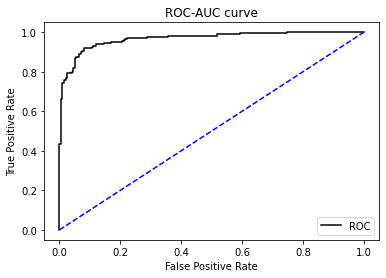

In [158]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

# Saving the Model

In [159]:
import joblib
joblib.dump(model,'Insurance_Fraud.obj')

['Insurance_Fraud.obj']